# GEOTHERMAL ENERGY CONSUMPTION PREDICTION

### Loading all the Libraries 

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Flatten
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, TimeDistributed
from statsmodels.tsa.arima.model import ARIMA
from keras.layers import Input
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

### Read the data

In [22]:
Geothermal_new = pd.read_excel('use_renew_sector.xlsx',sheet_name='Geothermal', header=1, index_col=0)

In [23]:
# Reset column names to the first row (State/Year) and skip the last row (US)
Geothermal_new.columns = Geothermal_new.iloc[0]
Geothermal = Geothermal_new[1:-1]

print(Geothermal)

State  1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  ...  \
AK        0     0     0     0     0     0     0     0     0     0  ...   
AL        0     0     0     0     0     0     0     0     0     0  ...   
AR        0     0     0     0     0     0     0     0     0     0  ...   
AZ        0     0     0     0     0     0     0     0     0     0  ...   
CA      359  1001  1061  1760  2132  1978  1958  3300  4532  6422  ...   
CO        0     0     0     0     0     0     0     0     0     0  ...   
CT        0     0     0     0     0     0     0     0     0     0  ...   
DC        0     0     0     0     0     0     0     0     0     0  ...   
DE        0     0     0     0     0     0     0     0     0     0  ...   
FL        0     0     0     0     0     0     0     0     0     0  ...   
GA        0     0     0     0     0     0     0     0     0     0  ...   
HI        0     0     0     0     0     0     0     0     0     0  ...   
IA        0     0     0     0     0   

### Load the state abbrevation and divide the years to 6 decades.

In [5]:
# state abbreviation dictionary
state_dict = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

# Select the columns for both time periods
Geothermal_1960_1970 = Geothermal.loc[:, '1960':'1970']
Geothermal_1970_1980 = Geothermal.loc[:, '1971':'1980']
Geothermal_1980_1990 = Geothermal.loc[:, '1981':'1990']
Geothermal_1990_2000 = Geothermal.loc[:, '1991':'2000']
Geothermal_2000_2010 = Geothermal.loc[:, '2001':'2010']
Geothermal_2010_2020 = Geothermal.loc[:, '2011':'2020']

# Calculate the average for each state over the specified years
average_1960_1970 = Geothermal_1960_1970.mean(axis=1)
average_1970_1980 = Geothermal_1970_1980.mean(axis=1)
average_1980_1990 = Geothermal_1980_1990.mean(axis=1)
average_1990_2000 = Geothermal_1990_2000.mean(axis=1)
average_2000_2010 = Geothermal_2000_2010.mean(axis=1)
average_2010_2020 = Geothermal_2010_2020.mean(axis=1)

## Print all states with its average for every 10 years

In [6]:
# Iterate through each time interval
time_intervals = [average_1960_1970, average_1970_1980, average_1980_1990, average_1990_2000, average_2000_2010, average_2010_2020]

for i, average_values in enumerate(time_intervals):
    states = []  # List to store full state names
    state_values = []  # List to store state values

    for state in average_values.index:
        # Check if the state abbreviation exists in the dictionary
        if state in state_dict:
            full_state_name = state_dict[state]
            state_value = average_values[state]
            states.append(full_state_name)
            state_values.append(state_value)

    print(f"\nStates from {1960 + i * 10} to {1970 + i * 10}:")
    for j, state in enumerate(states):
        # Round the state value to a specific number of decimal places
        rounded_value = round(state_values[j], 2)
        print(f"State: {state} - Value: {rounded_value}")


States from 1960 to 1970:
State: Alaska - Value: 0.0
State: Alabama - Value: 0.0
State: Arkansas - Value: 0.0
State: Arizona - Value: 0.0
State: California - Value: 2728.55
State: Colorado - Value: 0.0
State: Connecticut - Value: 0.0
State: District of Columbia - Value: 0.0
State: Delaware - Value: 0.0
State: Florida - Value: 0.0
State: Georgia - Value: 0.0
State: Hawaii - Value: 0.0
State: Iowa - Value: 0.0
State: Idaho - Value: 0.0
State: Illinois - Value: 0.0
State: Indiana - Value: 0.0
State: Kansas - Value: 0.0
State: Kentucky - Value: 0.0
State: Louisiana - Value: 0.0
State: Massachusetts - Value: 0.0
State: Maryland - Value: 0.0
State: Maine - Value: 0.0
State: Michigan - Value: 0.0
State: Minnesota - Value: 0.0
State: Missouri - Value: 0.0
State: Mississippi - Value: 0.0
State: Montana - Value: 0.0
State: North Carolina - Value: 0.0
State: North Dakota - Value: 0.0
State: Nebraska - Value: 0.0
State: New Hampshire - Value: 0.0
State: New Jersey - Value: 0.0
State: New Mexico -

## Average the state into 5 clusters

### Average for 1960 to 1970 and dividing it into 5 clusters

In [7]:
import pandas as pd
from sklearn.cluster import KMeans

# Combine the average values for 1960-1970
average_values = pd.concat([average_1960_1970], axis=--1)
average_values.columns = ['1960-1970']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 2 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1960-1970')

# Round off the values to 2 decimal places 
average_values['1960-1970'] = average_values['1960-1970'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1960-1970'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(2):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1960-1970')  # Sort states within the cluster
    cluster_min = cluster_states['1960-1970'].min()
    cluster_max = cluster_states['1960-1970'].max()
    for state, value in zip(cluster_states.index, cluster_states['1960-1970']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Geothermal_1960_1970.csv', index=True)



States in Cluster 0:
State: AK - Value: 0.0
State: AL - Value: 0.0
State: AR - Value: 0.0
State: AZ - Value: 0.0
State: CO - Value: 0.0
State: CT - Value: 0.0
State: DC - Value: 0.0
State: DE - Value: 0.0
State: FL - Value: 0.0
State: GA - Value: 0.0
State: MO - Value: 0.0
State: HI - Value: 0.0
State: ID - Value: 0.0
State: IL - Value: 0.0
State: IN - Value: 0.0
State: KS - Value: 0.0
State: KY - Value: 0.0
State: LA - Value: 0.0
State: MA - Value: 0.0
State: MD - Value: 0.0
State: ME - Value: 0.0
State: MI - Value: 0.0
State: MN - Value: 0.0
State: MS - Value: 0.0
State: WV - Value: 0.0
State: PA - Value: 0.0
State: NC - Value: 0.0
State: ND - Value: 0.0
State: NE - Value: 0.0
State: NH - Value: 0.0
State: NJ - Value: 0.0
State: NM - Value: 0.0
State: NV - Value: 0.0
State: NY - Value: 0.0
State: OH - Value: 0.0
State: OK - Value: 0.0
State: IA - Value: 0.0
State: MT - Value: 0.0
State: RI - Value: 0.0
State: SC - Value: 0.0
State: SD - Value: 0.0
State: TN - Value: 0.0
State: TX - 

### Mapping using Tablaue

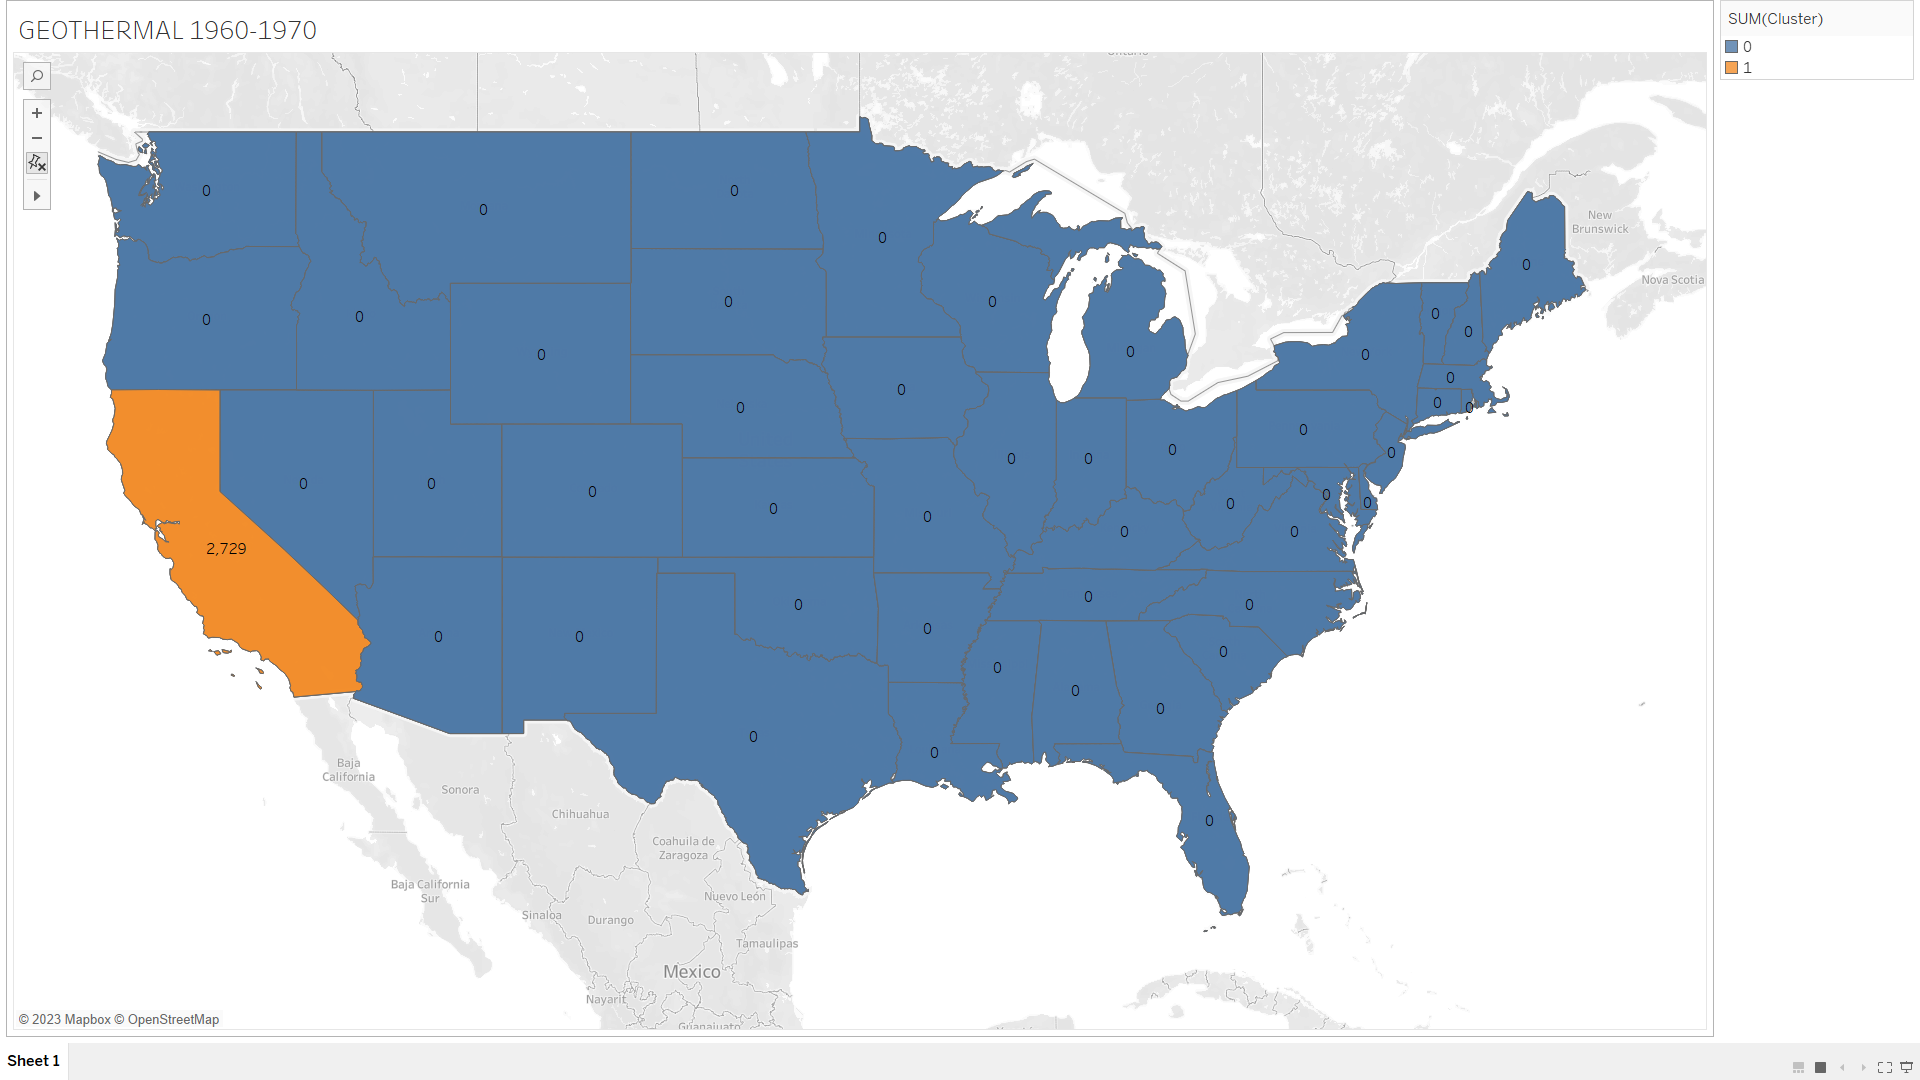

### Average for 1970 to 1980 and dividing it into 5 clusters

In [8]:
# Combine the average values for 1970-1980
average_values = pd.concat([average_1970_1980], axis=1)
average_values.columns = ['1970-1980']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1970-1980')

# Round off the values to 2 decimal places 
average_values['1970-1980'] = average_values['1970-1980'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1970-1980'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(2):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1970-1980')  # Sort states within the cluster
    cluster_min = cluster_states['1970-1980'].min()
    cluster_max = cluster_states['1970-1980'].max()
    for state, value in zip(cluster_states.index, cluster_states['1970-1980']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Geothermal_1970-1980.csv', index=True)



States in Cluster 0:
State: AK - Value: 0.0
State: AL - Value: 0.0
State: AR - Value: 0.0
State: AZ - Value: 0.0
State: CO - Value: 0.0
State: CT - Value: 0.0
State: DC - Value: 0.0
State: DE - Value: 0.0
State: FL - Value: 0.0
State: GA - Value: 0.0
State: MO - Value: 0.0
State: HI - Value: 0.0
State: ID - Value: 0.0
State: IL - Value: 0.0
State: IN - Value: 0.0
State: KS - Value: 0.0
State: KY - Value: 0.0
State: LA - Value: 0.0
State: MA - Value: 0.0
State: MD - Value: 0.0
State: ME - Value: 0.0
State: MI - Value: 0.0
State: MN - Value: 0.0
State: MS - Value: 0.0
State: WV - Value: 0.0
State: PA - Value: 0.0
State: NC - Value: 0.0
State: ND - Value: 0.0
State: NE - Value: 0.0
State: NH - Value: 0.0
State: NJ - Value: 0.0
State: NM - Value: 0.0
State: NV - Value: 0.0
State: NY - Value: 0.0
State: OH - Value: 0.0
State: OK - Value: 0.0
State: IA - Value: 0.0
State: MT - Value: 0.0
State: RI - Value: 0.0
State: SC - Value: 0.0
State: SD - Value: 0.0
State: TN - Value: 0.0
State: TX - 

### Mapping using Tablaue

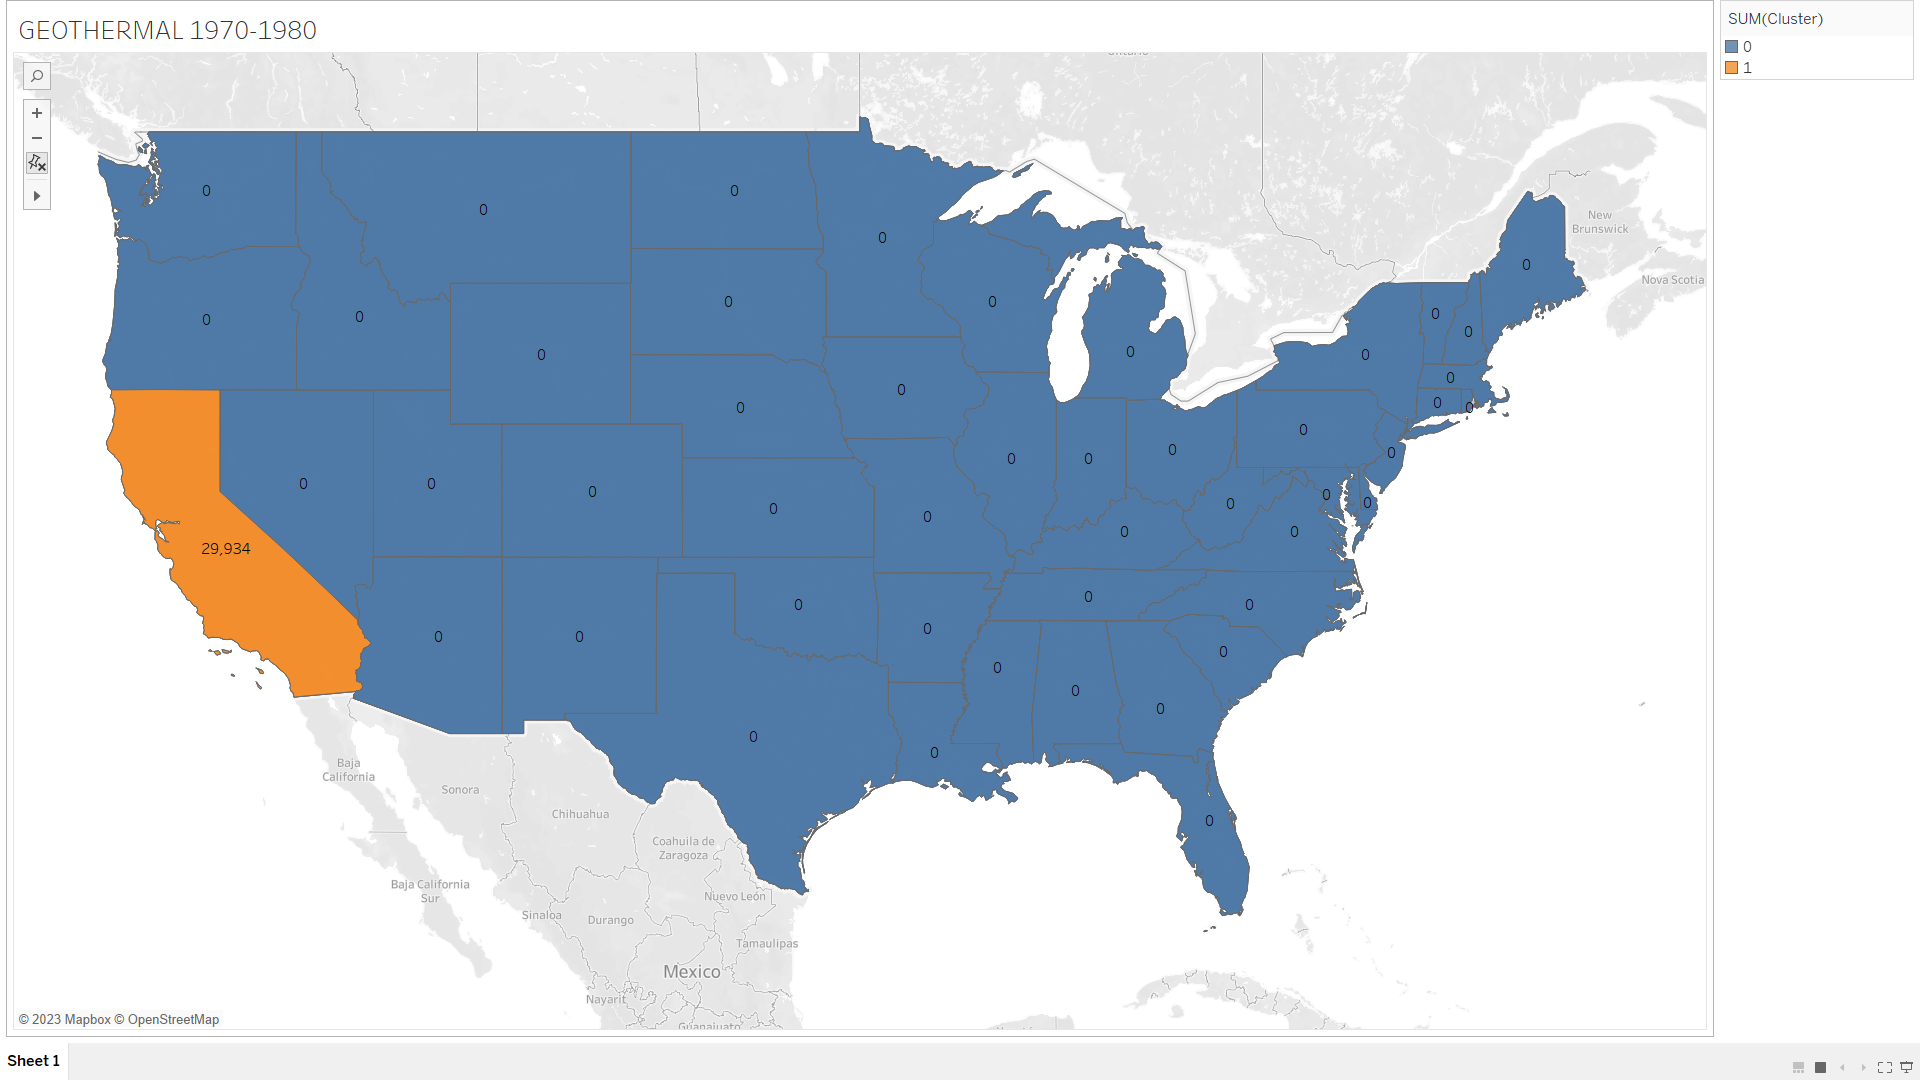

### Average for 1980 to 1990 and dividing it into 5 clusters

In [9]:
# Combine the average values for 1980-1990
average_values = pd.concat([average_1980_1990], axis=1)
average_values.columns = ['1980-1990']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1980-1990')

# Round off the values to 2 decimal places 
average_values['1980-1990'] = average_values['1980-1990'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1980-1990'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1980-1990')  # Sort states within the cluster
    cluster_min = cluster_states['1980-1990'].min()
    cluster_max = cluster_states['1980-1990'].max()
    for state, value in zip(cluster_states.index, cluster_states['1980-1990']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Geothermal_1980-1990.csv', index=True)



States in Cluster 0:
State: VT - Value: 0.0
State: RI - Value: 0.0
State: CT - Value: 0.0
State: DC - Value: 0.0
State: NH - Value: 0.0
State: WV - Value: 0.0
State: ME - Value: 0.0
State: OK - Value: 0.2
State: MA - Value: 2.1
State: AL - Value: 2.4
State: MS - Value: 3.0
State: TN - Value: 5.0
State: KS - Value: 6.5
State: GA - Value: 7.7
State: MO - Value: 8.6
State: AK - Value: 10.2
State: DE - Value: 10.5
State: IA - Value: 12.0
State: NJ - Value: 12.0
State: NY - Value: 12.3
State: WA - Value: 13.3
State: MD - Value: 13.7
State: NE - Value: 13.7
State: ND - Value: 14.7
State: WI - Value: 15.0
State: SC - Value: 15.6
State: AR - Value: 20.6
State: VA - Value: 22.1
State: LA - Value: 23.0
State: NM - Value: 23.2
State: NC - Value: 23.4
State: MT - Value: 25.2
State: MN - Value: 27.6
State: SD - Value: 28.4
State: PA - Value: 36.8
State: TX - Value: 43.4
State: KY - Value: 45.1
State: AZ - Value: 47.1
State: IL - Value: 51.4
Cluster 0 Range: 0.00 - 51.40

States in Cluster 1:
State

### Mapping using Tablaue

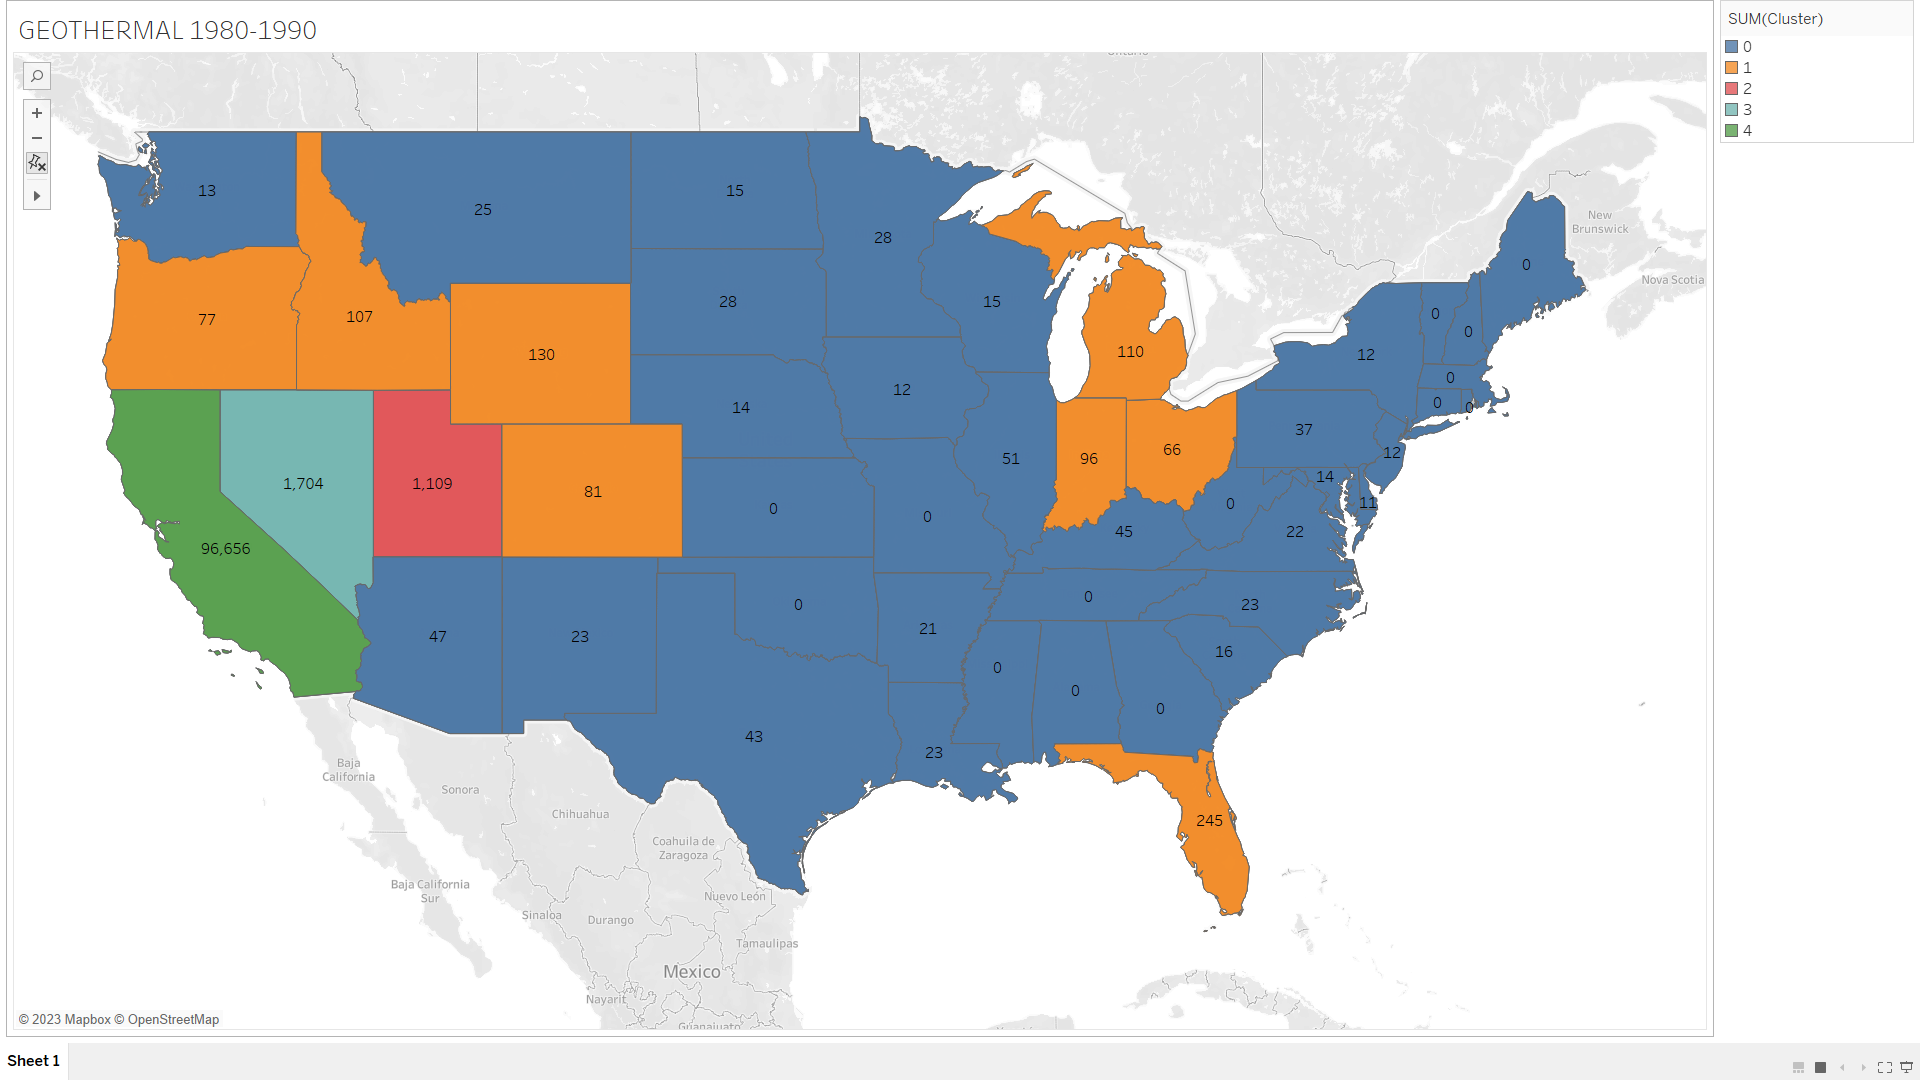

### Average for 1990 to 2000 an dividing it into 5 clusters

In [10]:
# Combine the average values for 1990-2000
average_values = pd.concat([average_1990_2000], axis=1)
average_values.columns = ['1990-2000']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1990-2000')

# Round off the values to 2 decimal places 
average_values['1990-2000'] = average_values['1990-2000'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1990-2000'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1990-2000')  # Sort states within the cluster
    cluster_min = cluster_states['1990-2000'].min()
    cluster_max = cluster_states['1990-2000'].max()
    for state, value in zip(cluster_states.index, cluster_states['1990-2000']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Geothermal_1990-2000.csv', index=True)



States in Cluster 0:
State: DC - Value: 0.0
State: RI - Value: 1.0
State: ME - Value: 1.0
State: VT - Value: 1.0
State: CT - Value: 1.0
State: NH - Value: 1.0
State: OK - Value: 1.4
State: WV - Value: 1.8
State: AL - Value: 24.9
State: TN - Value: 35.0
State: GA - Value: 57.6
State: AK - Value: 58.0
State: MO - Value: 59.8
State: DE - Value: 72.6
State: NJ - Value: 83.0
State: MD - Value: 95.9
State: WI - Value: 104.9
State: SC - Value: 108.8
State: MA - Value: 135.3
State: MS - Value: 141.9
State: AR - Value: 145.1
State: MT - Value: 156.6
State: ND - Value: 161.5
State: KS - Value: 163.1
State: NC - Value: 163.1
State: MN - Value: 191.6
State: IA - Value: 197.7
State: NY - Value: 204.2
State: WA - Value: 212.6
State: NE - Value: 214.0
State: AZ - Value: 246.8
State: NM - Value: 253.2
State: VA - Value: 270.7
State: LA - Value: 283.0
State: SD - Value: 293.6
Cluster 0 Range: 0.00 - 293.60

States in Cluster 1:
State: IL - Value: 357.6
State: PA - Value: 374.1
State: TX - Value: 413.7

### Mapping Using Tablaue

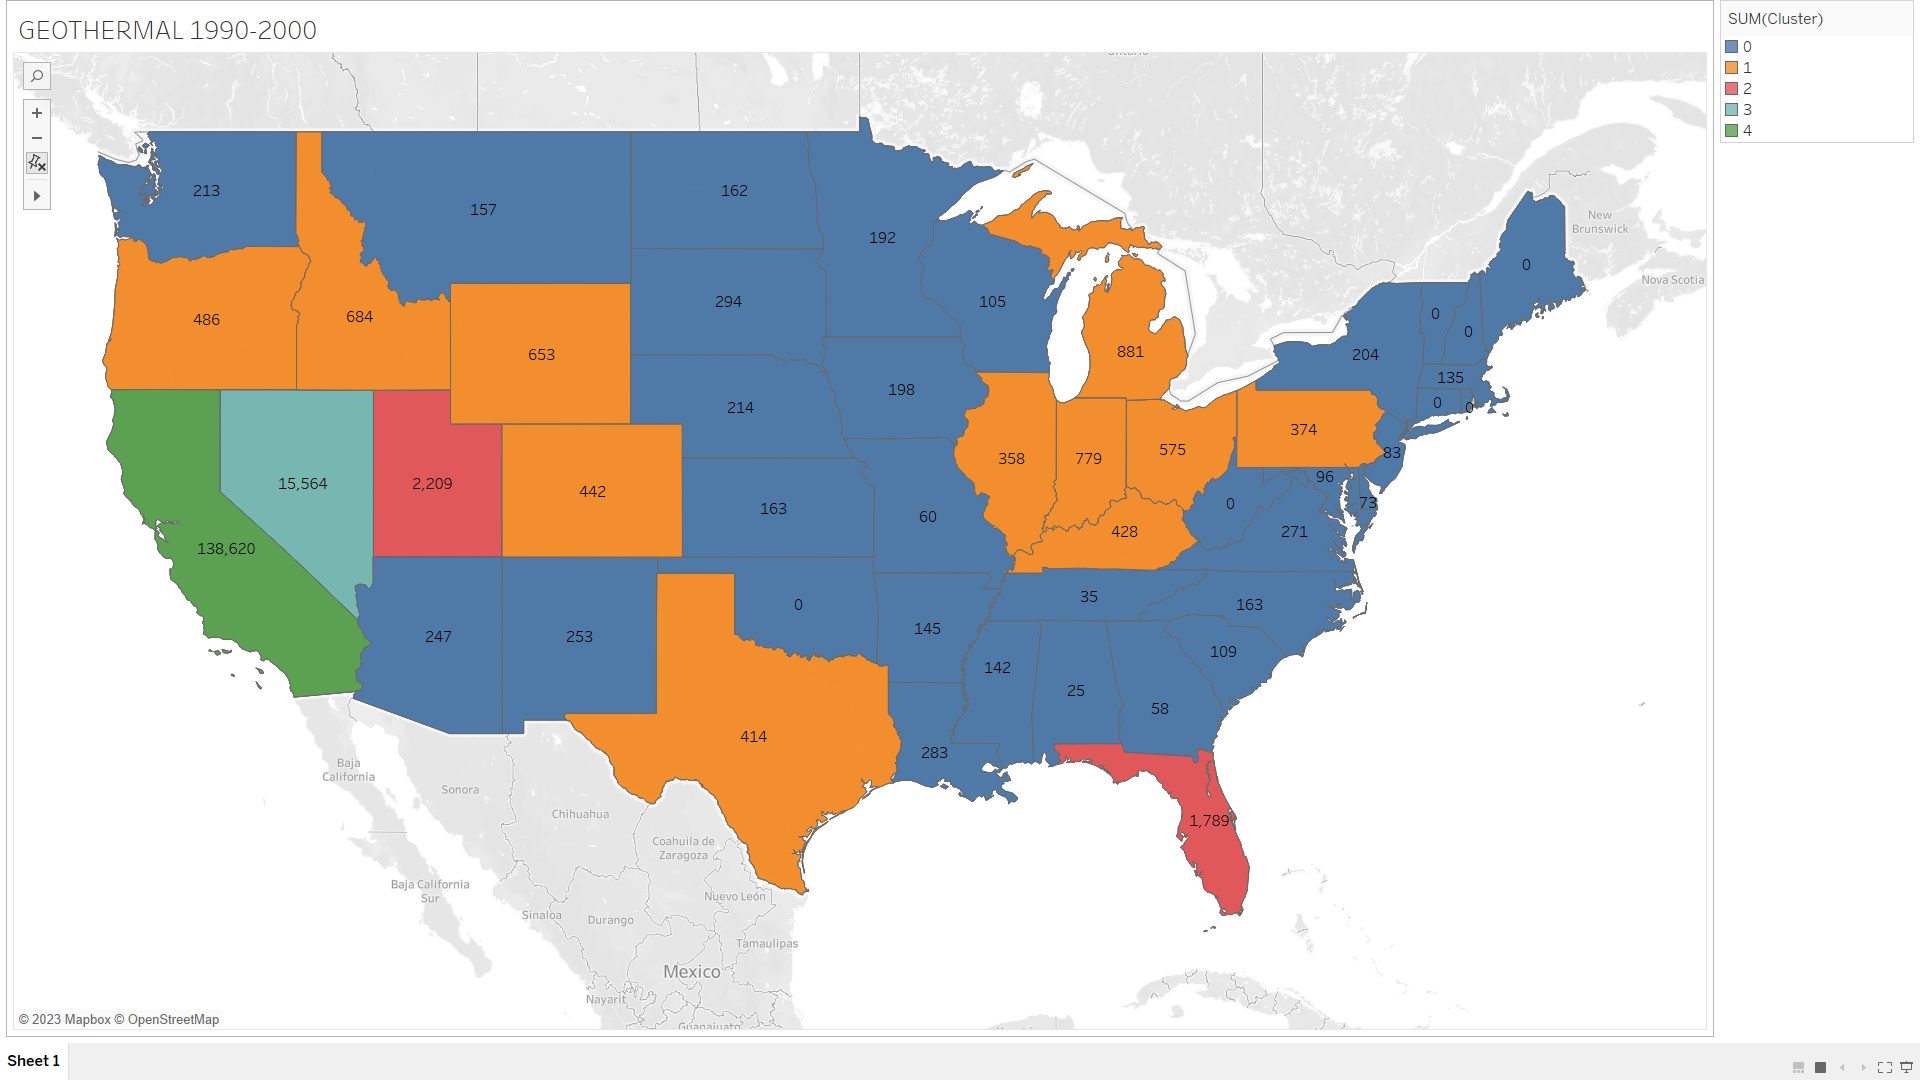

### Average for 2000 to 2010 an dividing it into 5 clusters

In [11]:
# Combine the average values for 2000-2010
average_values = pd.concat([average_2000_2010], axis=1)
average_values.columns = ['2000-2010']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='2000-2010')

# Round off the values to 2 decimal places 
average_values['2000-2010'] = average_values['2000-2010'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['2000-2010'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='2000-2010')  # Sort states within the cluster
    cluster_min = cluster_states['2000-2010'].min()
    cluster_max = cluster_states['2000-2010'].max()
    for state, value in zip(cluster_states.index, cluster_states['2000-2010']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Geothermal_2000-2010.csv', index=True)



States in Cluster 0:
State: DC - Value: 0.6
State: RI - Value: 10.3
State: CT - Value: 10.3
State: OK - Value: 12.3
State: VT - Value: 13.6
State: NH - Value: 14.5
State: WV - Value: 17.1
State: ME - Value: 25.2
State: AL - Value: 90.4
State: AK - Value: 104.7
State: TN - Value: 109.4
State: GA - Value: 179.9
State: MO - Value: 180.7
State: DE - Value: 220.7
State: NJ - Value: 239.1
State: MT - Value: 278.4
State: MD - Value: 292.0
State: AZ - Value: 297.7
State: WI - Value: 315.8
State: SC - Value: 332.5
State: AR - Value: 430.7
State: MA - Value: 480.3
State: NC - Value: 496.6
State: ND - Value: 524.0
State: MN - Value: 551.6
State: MS - Value: 553.6
State: KS - Value: 560.4
State: NM - Value: 577.5
State: CO - Value: 621.0
State: WA - Value: 651.6
State: NY - Value: 658.2
State: WY - Value: 661.6
State: IA - Value: 698.0
State: NE - Value: 706.0
State: VA - Value: 918.3
State: SD - Value: 969.4
State: OR - Value: 976.1
State: LA - Value: 1005.4
State: IL - Value: 1047.9
State: PA -

### Mapping using Tablaue

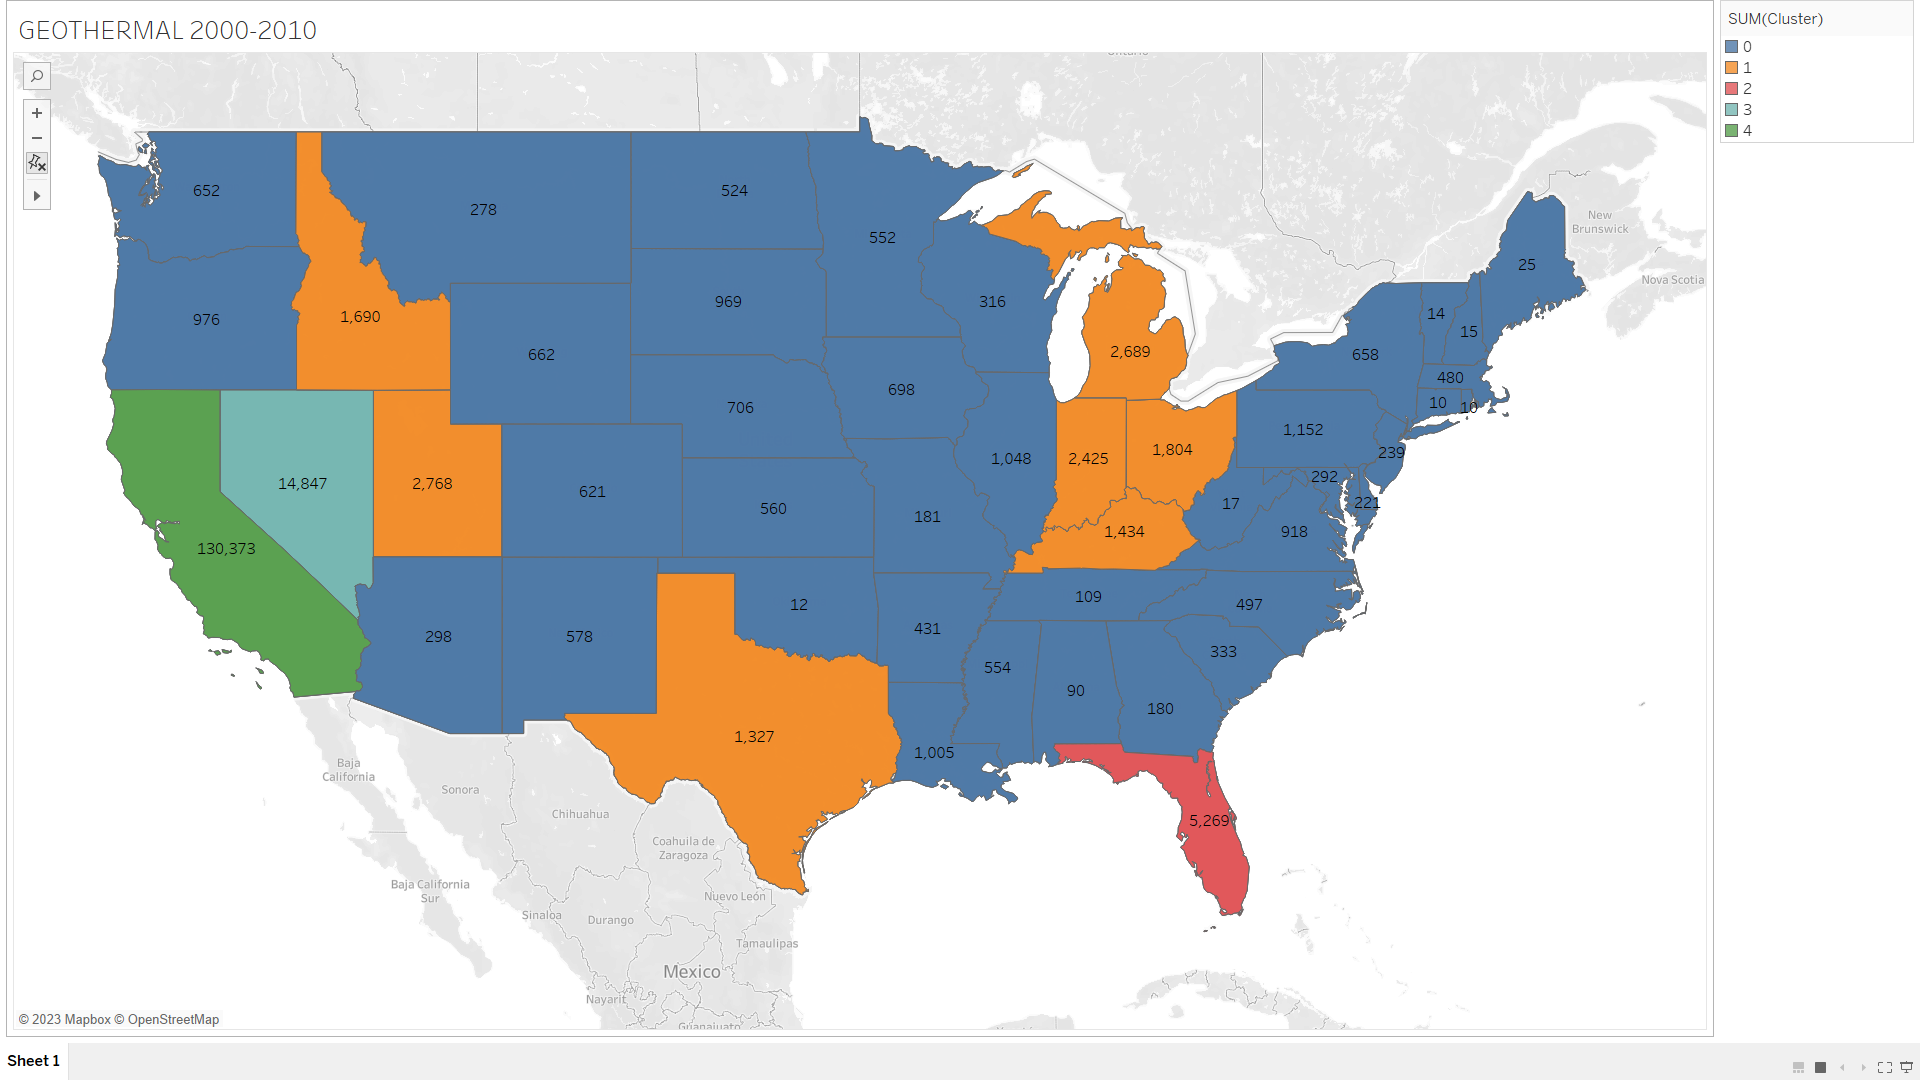

### Average for 2010 to 2020 an dividing it into 5 clusters

In [12]:
# Combine the average values for 2010-2020
average_values = pd.concat([average_2010_2020], axis=1)
average_values.columns = ['2010-2020']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='2010-2020')

# Round off the values to 2 decimal places 
average_values['2010-2020'] = average_values['2010-2020'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['2010-2020'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='2010-2020')  # Sort states within the cluster
    cluster_min = cluster_states['2010-2020'].min()
    cluster_max = cluster_states['2010-2020'].max()
    for state, value in zip(cluster_states.index, cluster_states['2010-2020']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Geothermal_2010-2020.csv', index=True)



States in Cluster 0:
State: CT - Value: 20.8
State: OK - Value: 23.9
State: DC - Value: 25.7
State: NH - Value: 28.8
State: VT - Value: 28.8
State: WV - Value: 31.8
State: RI - Value: 64.0
State: ME - Value: 71.6
State: AL - Value: 140.4
State: AK - Value: 188.8
State: TN - Value: 211.6
State: GA - Value: 312.6
State: MT - Value: 343.6
State: AZ - Value: 345.0
State: MO - Value: 349.7
State: DE - Value: 427.1
State: NJ - Value: 462.9
State: NM - Value: 528.0
State: MD - Value: 566.2
State: WI - Value: 610.9
State: SC - Value: 643.7
State: WY - Value: 663.7
State: CO - Value: 757.2
State: AR - Value: 802.2
State: MA - Value: 869.3
State: NC - Value: 960.6
State: MS - Value: 969.6
State: KS - Value: 977.1
State: ND - Value: 980.3
State: MN - Value: 1067.8
State: WA - Value: 1148.6
State: NY - Value: 1194.8
State: NE - Value: 1210.3
State: IA - Value: 1288.8
Cluster 0 Range: 20.80 - 1288.80

States in Cluster 1:
State: VA - Value: 1707.3
State: HI - Value: 1837.4
State: LA - Value: 1846.

### Mapping using Tablaue

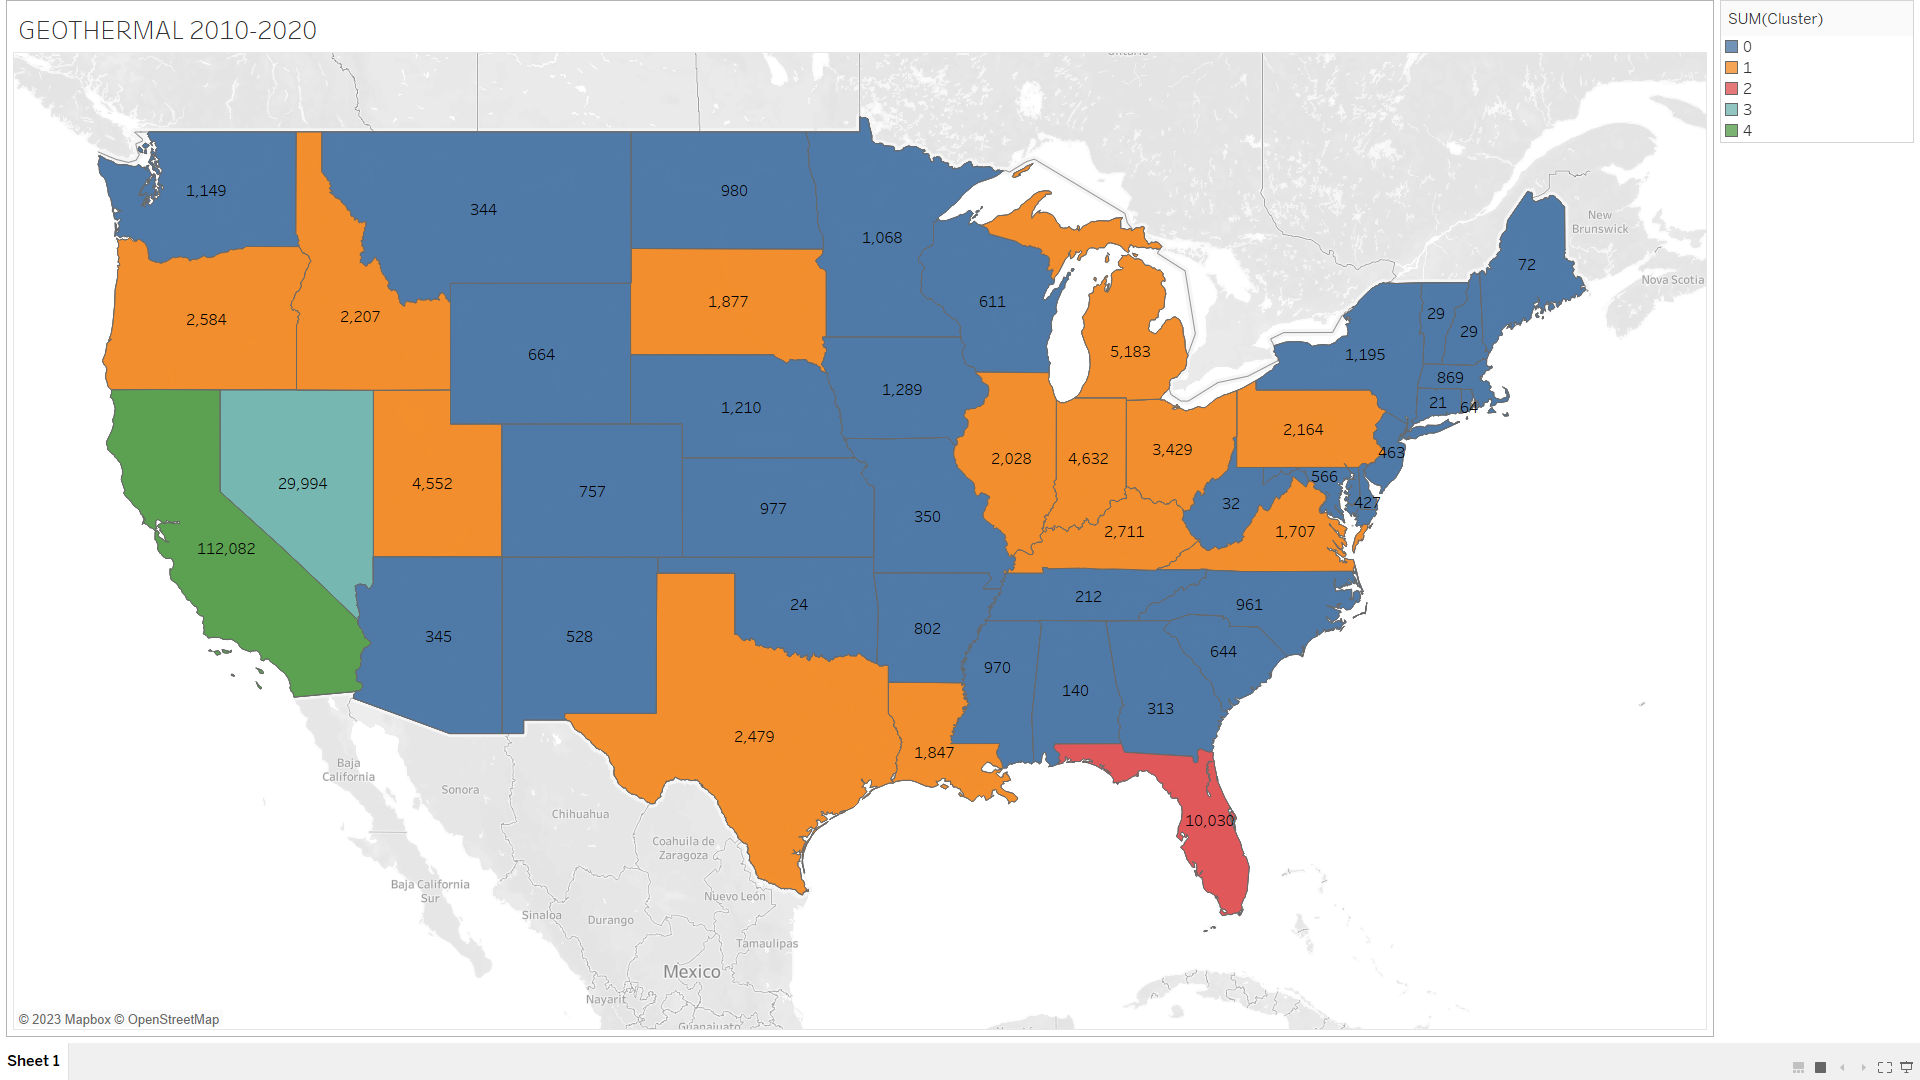

## Progression of the top 3 states 

### Progress of the states from 1960 to 1970

In [13]:
# Load the CSV file and read 
file_path = 'Geothermal_1960_1970.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information
state_abbreviations = ['FL','NV','CA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 2000-2010 interval
print("Information for states in the 1960-1970 interval:")
print(state_info)


Information for states in the 1960-1970 interval:
    1960-1970  Cluster State Full Name
NV       0.00        0          Nevada
FL       0.00        0         Florida
CA    2728.55        1      California


### Progress of the states from 1970 to 1980

In [14]:
# Load the CSV file and read 
file_path = 'Geothermal_1970-1980.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information
state_abbreviations = ['FL','NV','CA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 1970-1980 interval:")
print(state_info)


Information for states in the 1970-1980 interval:
    1970-1980  Cluster State Full Name
NV        0.0        0          Nevada
FL        0.0        0         Florida
CA    29933.7        1      California


### Progress of the states from 1980 to 1990

In [15]:
# Load the CSV file and read 
file_path = 'Geothermal_1980-1990.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information
state_abbreviations = ['FL','NV','CA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1980-1990 interval
print("Information for states in the 1980-1990 interval:")
print(state_info)


Information for states in the 1980-1990 interval:
    1980-1990  Cluster State Full Name
FL      244.7        1         Florida
NV     1703.5        3          Nevada
CA    96655.5        4      California


### Progress of the states from 1990 to 2000

In [16]:
# Load the CSV file and read 
file_path = 'Geothermal_1990-2000.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information
state_abbreviations = ['FL','NV','CA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 1990-2000 interval:")
print(state_info)


Information for states in the 1990-2000 interval:
    1990-2000  Cluster State Full Name
FL     1789.1        2         Florida
NV    15563.5        3          Nevada
CA   138619.9        4      California


### Progress of the states from 2000 to 2010

In [17]:
# Load the CSV file and read 
file_path = 'Geothermal_2000-2010.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information
state_abbreviations = ['FL','NV','CA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 2000-2010 interval
print("Information for states in the 2000-2010 interval:")
print(state_info)


Information for states in the 2000-2010 interval:
    2000-2010  Cluster State Full Name
FL     5268.8        2         Florida
NV    14847.0        3          Nevada
CA   130372.7        4      California


### Progress of the states from 2010 to 2020

In [18]:
# Load the CSV file and read 
file_path = 'Geothermal_2010-2020.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information
state_abbreviations = ['FL','NV','CA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 2010-2020 interval
print("Information for states in the 2010-2020 interval:")
print(state_info)


Information for states in the 2010-2020 interval:
    2010-2020  Cluster State Full Name
FL    10030.3        2         Florida
NV    29994.4        3          Nevada
CA   112082.2        4      California


### Plot the selected states

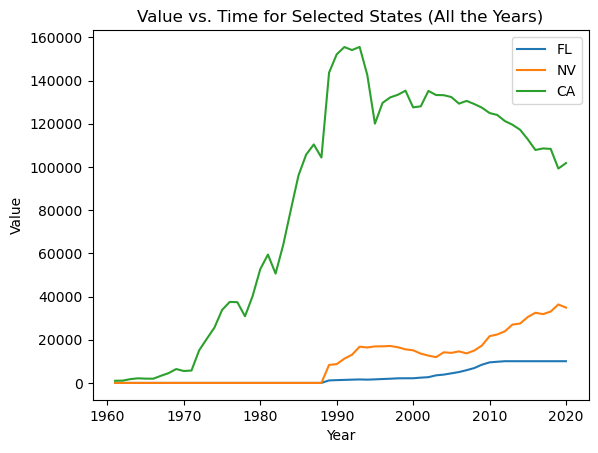

In [19]:
# Select only the 60 columns
Geothermal_60 = Geothermal.iloc[:, 1:61]

# Transpose the data to have years as rows and states as columns
Geothermal_T_60 = Geothermal_60.transpose()

# list of state abbreviations to plot
state_abbreviations =  ['FL','NV','CA']

# Plot data for the selected states with the legend label
for state in state_abbreviations:
    plt.plot(Geothermal_T_60.index, Geothermal_T_60[state], label=state)

# Add x-labels 
plt.xlabel('Year')
# Add y-legend
plt.ylabel('Value')
# Add title
plt.title('Value vs. Time for Selected States (All the Years)')
# Add legend
plt.legend(loc='best')

# Show the plot
plt.show()

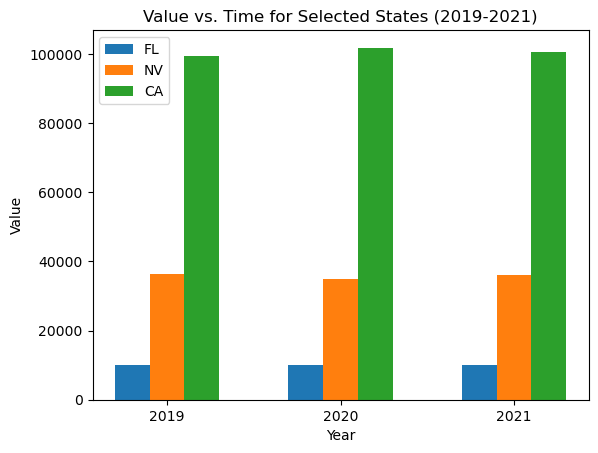

In [7]:
# Transpose the data to have years as rows and states as columns
Geothermal_T = Geothermal.transpose()

# Use iloc to get the required years
selected_years = Geothermal_T.loc['2019':'2021']

# list of state abbreviations to plot
state_abbreviations = ['FL','NV','CA']

# Set the width of the bars
bar_width = 0.2  

# Plot data for the selected states with the correct legend label
for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions = np.arange(len(selected_years.index)) + i * bar_width
    
    plt.bar(x_positions, selected_years[state], label=state, width=bar_width)

# Add x-labels 
plt.xlabel('Year')
# Add y-labels 
plt.ylabel('Value')
# Add title
plt.title('Value vs. Time for Selected States (2019-2021)')
plt.xticks(np.arange(len(selected_years.index)) + (len(state_abbreviations) - 1) * bar_width / 2, selected_years.index)
plt.legend()

# Show the plot
plt.show()

## Deep Learning Forecasting

### LSTM

In [4]:
# sequence length and accuracy threshold
sequence_length_lstm = 55
accuracy_threshold_lstm = 0.01 

# Loop through each selected state
state_mse_lstm = {}
state_rmse_lstm = {}
state_forecasts_lstm = {}
state_predictions_lstm = {}  

for state in ['FL','NV','CA']:
    # Extract the data for the selected state
    data = Geothermal.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for LSTM
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_lstm):
        seq = scaled_data[i:i + sequence_length_lstm]
        target = scaled_data[i + sequence_length_lstm]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train an LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_lstm, 1)))
    model_lstm.add(Dense(units=1))
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts
    forecasts_lstm = []
    # Lists to store actual values
    actual_values_lstm = []
    # Lists to store predictions
    predictions_lstm = []

    # Iterate through the forecast years
    current_sequence_lstm = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
        actual_value_lstm = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_lstm.reshape(1, sequence_length_lstm, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_lstm)
        mse_lstm = mean_squared_error([actual_value_lstm], [forecast_lstm[0]])
        model_lstm.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_lstm[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_lstm > accuracy_threshold_lstm:
            continue
        else:
            forecasts_lstm.append(forecast_lstm[0])
            actual_values_lstm.append(actual_value_lstm)
            # Store the prediction for the current year
            prediction_lstm = scaler.inverse_transform(forecast_lstm.reshape(-1, 1))[0][0]
            predictions_lstm.append(prediction_lstm)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_lstm = scaler.inverse_transform(np.array(forecasts_lstm).reshape(-1, 1))
    actual_values_lstm = scaler.inverse_transform(np.array(actual_values_lstm).reshape(-1, 1))

    # Calculate the MSE
    mse_lstm = mean_squared_error(actual_values_lstm, forecasts_lstm)

    # Calculate the RMSE
    rmse_lstm = np.sqrt(mse_lstm)
    state_mse_lstm[state] = mse_lstm
    state_rmse_lstm[state] = rmse_lstm

    # Forecast for 2023
    forecast_2022_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2022_lstm[0])
    # Forecast for 2023
    forecast_2023_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_lstm = scaler.inverse_transform(forecast_2022_lstm.reshape(-1, 1))[0][0]
    forecast_2023_lstm = scaler.inverse_transform(forecast_2023_lstm.reshape(-1, 1))[0][0]
    state_forecasts_lstm[state] = {'2022': forecast_2022_lstm, '2023': forecast_2023_lstm}

    # Forecast and Store predictions for 2019
    forecast_2019_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2019_lstm[0])
    # Forecast and Store predictions for 2020
    forecast_2020_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2020_lstm[0])
    # Forecast and Store predictions for 2021
    forecast_2021_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2021_lstm[0])

    # Inverse transform the predictions for 2019
    prediction_2019_lstm = scaler.inverse_transform(forecast_2019_lstm.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_lstm = scaler.inverse_transform(forecast_2020_lstm.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_lstm = scaler.inverse_transform(forecast_2021_lstm.reshape(-1, 1))[0][0]
    state_predictions_lstm[state] = {'2019': prediction_2019_lstm, '2020': prediction_2020_lstm, '2021': prediction_2021_lstm}

# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_lstm.items():
    print(f"MSE for {state} (LSTM): {mse_value:.2f}")    
# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_lstm.items():
    print(f"RMSE for {state} (LSTM): {rmse_value:.2f}")

# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_lstm.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_lstm.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year
state_accuracies_lstm = {}
for state in state_predictions_lstm:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Geothermal.loc[state].loc[int(year)]
        predicted_value = state_predictions_lstm[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_lstm[state] = accuracies_state

# Print accuracies for each state and year
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States:")
for state, accuracies_state in state_accuracies_lstm.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 484ms/step
Epoch 1/20
8/8 [==============================] - 1s 10ms/step - loss: 0.7332
Epoch 2/20
8/8 [==============================] - 0s 10ms/step - loss: 0.4523
Epoch 3/20
8/8 [==============================] - 0s 9ms/step - loss: 0.2427
Epoch 4/20
8/8 [==============================] - 0s 11ms/step - loss: 0.1411
Epoch 5/20
8/8 [==============================] - 0s 15ms/step - loss: 0.1528
Epoch 6/20
8/8 [==============================] - 0s 10ms/step - loss: 0.1476
Epoch 7/20
8/8 [==============================] - 0s 12ms/step - loss: 0.1354
Epoch 8/20
8/8 [==============================] - 0s 11ms/step - loss: 0.1366
Epoch 9/20
8/8 [==============================] - 0s 10ms/step - loss: 0.1366
Epoch 10/20
8/8 [==============================] - 0s 11ms/step - loss: 0.1356
Epoch 11/20
8/8 [==============================] - 0s 11ms/step - loss: 0.1366
Epoch 12/20
8/8 [==============================] - 0s 12ms/step - loss: 0.1333
Epoch 13/

17/17 [==============================] - 0s 9ms/step - loss: 0.0397
Epoch 20/20
1/1 [==============================] - 0s 12ms/step
Epoch 1/20
18/18 [==============================] - 0s 10ms/step - loss: 0.0422
Epoch 2/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0405
Epoch 3/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0422
Epoch 4/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0596
Epoch 5/20
18/18 [==============================] - 0s 8ms/step - loss: 0.0436
Epoch 6/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0378
Epoch 7/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0449
Epoch 8/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0395
Epoch 9/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0370
Epoch 10/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0428
Epoch 11/20
18/18 [==============================] - 0s 10ms/step - loss: 0.

27/27 [==============================] - 0s 10ms/step - loss: 0.0298
Epoch 17/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0294
Epoch 18/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0262
Epoch 19/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0344
Epoch 20/20
1/1 [==============================] - 0s 37ms/step
Epoch 1/20
28/28 [==============================] - 0s 11ms/step - loss: 0.0248
Epoch 2/20
28/28 [==============================] - 0s 12ms/step - loss: 0.0236
Epoch 3/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0265
Epoch 4/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0260
Epoch 5/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0251
Epoch 6/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 7/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0238
Epoch 8/20
28/28 [==============================] - 0s 10ms/step - l

32/32 [==============================] - 0s 10ms/step - loss: 0.0231
Epoch 16/20
32/32 [==============================] - 0s 11ms/step - loss: 0.0205
Epoch 17/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0203
Epoch 18/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0207
Epoch 19/20
32/32 [==============================] - 0s 11ms/step - loss: 0.0220
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
33/33 [==============================] - 0s 10ms/step - loss: 0.0255
Epoch 2/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0236
Epoch 3/20
33/33 [==============================] - 0s 10ms/step - loss: 0.0186
Epoch 4/20
33/33 [==============================] - 0s 11ms/step - loss: 0.0223
Epoch 5/20
33/33 [==============================] - 0s 10ms/step - loss: 0.0192
Epoch 6/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 7/20
33/33 [==============================] - 0s 10ms/step -

42/42 [==============================] - 0s 10ms/step - loss: 0.0197
Epoch 13/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0177
Epoch 14/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 15/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 16/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0169
Epoch 17/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0171
Epoch 18/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0167
Epoch 19/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0166
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0141
Epoch 2/20
43/43 [==============================] - 0s 10ms/step - loss: 0.0144
Epoch 3/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 4/20
43/43 [==============================] - 0s 10ms/step 

52/52 [==============================] - 0s 8ms/step - loss: 0.0148
Epoch 11/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 12/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0144
Epoch 13/20
52/52 [==============================] - 1s 10ms/step - loss: 0.0138
Epoch 14/20
52/52 [==============================] - 1s 10ms/step - loss: 0.0131
Epoch 15/20
52/52 [==============================] - 1s 10ms/step - loss: 0.0143
Epoch 16/20
52/52 [==============================] - 1s 10ms/step - loss: 0.0134
Epoch 17/20
52/52 [==============================] - 1s 10ms/step - loss: 0.0132
Epoch 18/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0128
Epoch 19/20
52/52 [==============================] - 1s 10ms/step - loss: 0.0139
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
53/53 [==============================] - 1s 10ms/step - loss: 0.0143
Epoch 2/20
53/53 [==============================] - 1s 9ms/ste

57/57 [==============================] - 1s 9ms/step - loss: 0.0160
Epoch 10/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0162
Epoch 11/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0146
Epoch 12/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0136
Epoch 13/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0126
Epoch 14/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0123
Epoch 15/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0114
Epoch 16/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0115
Epoch 17/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0121
Epoch 18/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0119
Epoch 19/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0117
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
58/58 [==============================] - 1s 10ms/ste

62/62 [==============================] - 1s 9ms/step - loss: 0.0108
Epoch 9/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0118
Epoch 10/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0135
Epoch 11/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0143
Epoch 12/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0114
Epoch 13/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0112
Epoch 14/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0114
Epoch 15/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0111
Epoch 16/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0106
Epoch 17/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0112
Epoch 18/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0119
Epoch 19/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0110
Epoch 20/20
1/1 [==============================]

12/12 [==============================] - 0s 10ms/step - loss: 0.0951
Epoch 6/20
12/12 [==============================] - 0s 11ms/step - loss: 0.0896
Epoch 7/20
12/12 [==============================] - 0s 10ms/step - loss: 0.0656
Epoch 8/20
12/12 [==============================] - 0s 11ms/step - loss: 0.0650
Epoch 9/20
12/12 [==============================] - 0s 10ms/step - loss: 0.0750
Epoch 10/20
12/12 [==============================] - 0s 10ms/step - loss: 0.0610
Epoch 11/20
12/12 [==============================] - 0s 9ms/step - loss: 0.0625
Epoch 12/20
12/12 [==============================] - 0s 10ms/step - loss: 0.0589
Epoch 13/20
12/12 [==============================] - 0s 10ms/step - loss: 0.0690
Epoch 14/20
12/12 [==============================] - 0s 9ms/step - loss: 0.0543
Epoch 15/20
12/12 [==============================] - 0s 10ms/step - loss: 0.0598
Epoch 16/20
12/12 [==============================] - 0s 11ms/step - loss: 0.0636
Epoch 17/20
12/12 [===========================

22/22 [==============================] - 0s 10ms/step - loss: 0.0311
Epoch 4/20
22/22 [==============================] - 0s 10ms/step - loss: 0.0283
Epoch 5/20
22/22 [==============================] - 0s 9ms/step - loss: 0.0300
Epoch 6/20
22/22 [==============================] - 0s 10ms/step - loss: 0.0295
Epoch 7/20
22/22 [==============================] - 0s 10ms/step - loss: 0.0299
Epoch 8/20
22/22 [==============================] - 0s 10ms/step - loss: 0.0367
Epoch 9/20
22/22 [==============================] - 0s 10ms/step - loss: 0.0373
Epoch 10/20
22/22 [==============================] - 0s 10ms/step - loss: 0.0333
Epoch 11/20
22/22 [==============================] - 0s 9ms/step - loss: 0.0353
Epoch 12/20
22/22 [==============================] - 0s 8ms/step - loss: 0.0297
Epoch 13/20
22/22 [==============================] - 0s 10ms/step - loss: 0.0296
Epoch 14/20
22/22 [==============================] - 0s 10ms/step - loss: 0.0304
Epoch 15/20
22/22 [==============================

27/27 [==============================] - 0s 10ms/step - loss: 0.0318
Epoch 3/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0360
Epoch 4/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0247
Epoch 5/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0329
Epoch 6/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0263
Epoch 7/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 8/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0227
Epoch 9/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0246
Epoch 10/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0244
Epoch 11/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0247
Epoch 12/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0253
Epoch 13/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0247
Epoch 14/20
27/27 [==============================] - 0

32/32 [==============================] - 0s 10ms/step - loss: 0.0240
Epoch 2/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 3/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0223
Epoch 4/20
32/32 [==============================] - 0s 11ms/step - loss: 0.0218
Epoch 5/20
32/32 [==============================] - 0s 11ms/step - loss: 0.0261
Epoch 6/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0225
Epoch 7/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0394
Epoch 8/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0214
Epoch 9/20
32/32 [==============================] - 0s 11ms/step - loss: 0.0235
Epoch 10/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0212
Epoch 11/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0217
Epoch 12/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0217
Epoch 13/20
32/32 [==============================] - 0

41/41 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 20/20
1/1 [==============================] - 0s 32ms/step
Epoch 1/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0172
Epoch 2/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0174
Epoch 3/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0183
Epoch 4/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0186
Epoch 5/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0172
Epoch 6/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 7/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0173
Epoch 8/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0176
Epoch 9/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0178
Epoch 10/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0179
Epoch 11/20
42/42 [==============================] - 0s 10ms/step - lo

46/46 [==============================] - 1s 12ms/step - loss: 0.0152
Epoch 19/20
46/46 [==============================] - 1s 11ms/step - loss: 0.0148
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
47/47 [==============================] - 0s 10ms/step - loss: 0.0138
Epoch 2/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 3/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0146
Epoch 4/20
47/47 [==============================] - 0s 10ms/step - loss: 0.0158
Epoch 5/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 6/20
47/47 [==============================] - 0s 10ms/step - loss: 0.0151
Epoch 7/20
47/47 [==============================] - 0s 10ms/step - loss: 0.0156
Epoch 8/20
47/47 [==============================] - 0s 10ms/step - loss: 0.0156
Epoch 9/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 10/20
47/47 [==============================] - 1s 11ms/step - lo

51/51 [==============================] - 1s 10ms/step - loss: 0.0126
Epoch 18/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 19/20
51/51 [==============================] - 1s 10ms/step - loss: 0.0137
Epoch 20/20
1/1 [==============================] - 0s 25ms/step
Epoch 1/20
52/52 [==============================] - 1s 10ms/step - loss: 0.0129
Epoch 2/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0141
Epoch 3/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 4/20
52/52 [==============================] - 1s 10ms/step - loss: 0.0129
Epoch 5/20
52/52 [==============================] - 1s 10ms/step - loss: 0.0119
Epoch 6/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 7/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0118
Epoch 8/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0130
Epoch 9/20
52/52 [==============================] - 0s 9ms/step - loss

56/56 [==============================] - 1s 10ms/step - loss: 0.0106
Epoch 17/20
56/56 [==============================] - 1s 10ms/step - loss: 0.0124
Epoch 18/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0117
Epoch 19/20
56/56 [==============================] - 1s 10ms/step - loss: 0.0127
Epoch 20/20
1/1 [==============================] - 0s 18ms/step
Epoch 1/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0121
Epoch 2/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0138
Epoch 3/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0128
Epoch 4/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0122
Epoch 5/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0122
Epoch 6/20
57/57 [==============================] - 1s 11ms/step - loss: 0.0118
Epoch 7/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0108
Epoch 8/20
57/57 [==============================] - 1s 9ms/step -

61/61 [==============================] - 1s 9ms/step - loss: 0.0122
Epoch 16/20
61/61 [==============================] - 1s 10ms/step - loss: 0.0150
Epoch 17/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0149
Epoch 18/20
61/61 [==============================] - 1s 11ms/step - loss: 0.0145
Epoch 19/20
61/61 [==============================] - 1s 10ms/step - loss: 0.0145
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0142
Epoch 2/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0145
Epoch 3/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0165
Epoch 4/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0142
Epoch 5/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0144
Epoch 6/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0142
Epoch 7/20
62/62 [==============================] - 1s 12ms/step - 

16/16 [==============================] - 0s 13ms/step - loss: 0.0363
Epoch 11/20
16/16 [==============================] - 0s 9ms/step - loss: 0.0313
Epoch 12/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0326
Epoch 13/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0295
Epoch 14/20
16/16 [==============================] - 0s 11ms/step - loss: 0.0324
Epoch 15/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0282
Epoch 16/20
16/16 [==============================] - 0s 10ms/step - loss: 0.0266
Epoch 17/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0283
Epoch 18/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0270
Epoch 19/20
16/16 [==============================] - 0s 12ms/step - loss: 0.0287
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
17/17 [==============================] - 0s 10ms/step - loss: 0.0263
Epoch 2/20
17/17 [==============================] - 0s 10ms/step

26/26 [==============================] - 0s 11ms/step - loss: 0.0143
Epoch 9/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 10/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0153
Epoch 11/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 12/20
26/26 [==============================] - 0s 10ms/step - loss: 0.0177
Epoch 13/20
26/26 [==============================] - 0s 11ms/step - loss: 0.0167
Epoch 14/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0187
Epoch 15/20
26/26 [==============================] - 0s 10ms/step - loss: 0.0154
Epoch 16/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 17/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0169
Epoch 18/20
26/26 [==============================] - 0s 10ms/step - loss: 0.0152
Epoch 19/20
26/26 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 20/20
1/1 [==============================

36/36 [==============================] - 0s 10ms/step - loss: 0.0112
Epoch 6/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 7/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 8/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0113
Epoch 9/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 10/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 11/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 12/20
36/36 [==============================] - 0s 11ms/step - loss: 0.0113
Epoch 13/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0104
Epoch 14/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0113
Epoch 15/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 16/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 17/20
36/36 [==============================] -

46/46 [==============================] - 0s 9ms/step - loss: 0.0087
Epoch 4/20
46/46 [==============================] - 1s 12ms/step - loss: 0.0351
Epoch 5/20
46/46 [==============================] - 0s 10ms/step - loss: 0.0395
Epoch 6/20
46/46 [==============================] - 1s 11ms/step - loss: 0.0288
Epoch 7/20
46/46 [==============================] - 0s 10ms/step - loss: 0.0258
Epoch 8/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0238
Epoch 9/20
46/46 [==============================] - 0s 10ms/step - loss: 0.0219
Epoch 10/20
46/46 [==============================] - 0s 10ms/step - loss: 0.0228
Epoch 11/20
46/46 [==============================] - 1s 11ms/step - loss: 0.0198
Epoch 12/20
46/46 [==============================] - 1s 14ms/step - loss: 0.0183
Epoch 13/20
46/46 [==============================] - 634s 14s/step - loss: 0.0171
Epoch 14/20
46/46 [==============================] - 1s 20ms/step - loss: 0.0166
Epoch 15/20
46/46 [============================

51/51 [==============================] - 0s 7ms/step - loss: 0.0074
Epoch 3/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0073
Epoch 4/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0069
Epoch 5/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0069
Epoch 6/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0097
Epoch 7/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0091
Epoch 8/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 9/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 10/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0075
Epoch 11/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0079
Epoch 12/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0081
Epoch 13/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0084
Epoch 14/20
51/51 [==============================] - 0s 9ms

1/1 [==============================] - 0s 22ms/step
Epoch 1/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0071
Epoch 2/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0069
Epoch 3/20
61/61 [==============================] - 1s 8ms/step - loss: 0.0066
Epoch 4/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0062
Epoch 5/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0090
Epoch 6/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0086
Epoch 7/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0086
Epoch 8/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0080
Epoch 9/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0063
Epoch 10/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0075
Epoch 11/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0063
Epoch 12/20
61/61 [==============================] - 1s 9ms/step - loss: 0.00

In [4]:
# sequence length and accuracy threshold
sequence_length_lstm = 40
accuracy_threshold_lstm = 0.01 

# Loop through each selected state
state_mse_lstm = {}
state_rmse_lstm = {}
state_forecasts_lstm = {}
state_predictions_lstm = {}  

for state in ['FL','NV','CA']:
    # Extract the data for the selected state
    data = Geothermal.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for LSTM
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_lstm):
        seq = scaled_data[i:i + sequence_length_lstm]
        target = scaled_data[i + sequence_length_lstm]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train an LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_lstm, 1)))
    model_lstm.add(Dense(units=1))
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts
    forecasts_lstm = []
    # Lists to store actual values
    actual_values_lstm = []
    # Lists to store predictions
    predictions_lstm = []

    # Iterate through the forecast years
    current_sequence_lstm = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
        actual_value_lstm = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_lstm.reshape(1, sequence_length_lstm, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_lstm)
        mse_lstm = mean_squared_error([actual_value_lstm], [forecast_lstm[0]])
        model_lstm.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_lstm[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_lstm > accuracy_threshold_lstm:
            continue
        else:
            forecasts_lstm.append(forecast_lstm[0])
            actual_values_lstm.append(actual_value_lstm)
            # Store the prediction for the current year
            prediction_lstm = scaler.inverse_transform(forecast_lstm.reshape(-1, 1))[0][0]
            predictions_lstm.append(prediction_lstm)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_lstm = scaler.inverse_transform(np.array(forecasts_lstm).reshape(-1, 1))
    actual_values_lstm = scaler.inverse_transform(np.array(actual_values_lstm).reshape(-1, 1))

    # Calculate the MSE
    mse_lstm = mean_squared_error(actual_values_lstm, forecasts_lstm)

    # Calculate the RMSE
    rmse_lstm = np.sqrt(mse_lstm)
    state_mse_lstm[state] = mse_lstm
    state_rmse_lstm[state] = rmse_lstm

    # Forecast for 2023
    forecast_2022_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2022_lstm[0])
    # Forecast for 2023
    forecast_2023_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_lstm = scaler.inverse_transform(forecast_2022_lstm.reshape(-1, 1))[0][0]
    forecast_2023_lstm = scaler.inverse_transform(forecast_2023_lstm.reshape(-1, 1))[0][0]
    state_forecasts_lstm[state] = {'2022': forecast_2022_lstm, '2023': forecast_2023_lstm}

    # Forecast and Store predictions for 2019
    forecast_2019_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2019_lstm[0])
    # Forecast and Store predictions for 2020
    forecast_2020_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2020_lstm[0])
    # Forecast and Store predictions for 2021
    forecast_2021_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2021_lstm[0])

    # Inverse transform the predictions for 2019
    prediction_2019_lstm = scaler.inverse_transform(forecast_2019_lstm.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_lstm = scaler.inverse_transform(forecast_2020_lstm.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_lstm = scaler.inverse_transform(forecast_2021_lstm.reshape(-1, 1))[0][0]
    state_predictions_lstm[state] = {'2019': prediction_2019_lstm, '2020': prediction_2020_lstm, '2021': prediction_2021_lstm}

# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_lstm.items():
    print(f"MSE for {state} (LSTM): {mse_value:.2f}")    
# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_lstm.items():
    print(f"RMSE for {state} (LSTM): {rmse_value:.2f}")

# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_lstm.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_lstm.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year
state_accuracies_lstm = {}
for state in state_predictions_lstm:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Geothermal.loc[state].loc[int(year)]
        predicted_value = state_predictions_lstm[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_lstm[state] = accuracies_state

# Print accuracies for each state and year
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States:")
for state, accuracies_state in state_accuracies_lstm.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 2s 2s/step
Epoch 1/20
23/23 [==============================] - 5s 17ms/step - loss: 0.4079
Epoch 2/20
23/23 [==============================] - 0s 20ms/step - loss: 0.1338
Epoch 3/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0925
Epoch 4/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0910
Epoch 5/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0769
Epoch 6/20
23/23 [==============================] - 0s 17ms/step - loss: 0.0753
Epoch 7/20
23/23 [==============================] - 1s 24ms/step - loss: 0.0742
Epoch 8/20
23/23 [==============================] - 0s 21ms/step - loss: 0.0685
Epoch 9/20
23/23 [==============================] - 0s 20ms/step - loss: 0.0750
Epoch 10/20
23/23 [==============================] - 0s 18ms/step - loss: 0.0774
Epoch 11/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0693
Epoch 12/20
23/23 [==============================] - 0s 19ms/step - 

32/32 [==============================] - 1s 19ms/step - loss: 0.0258
Epoch 18/20
32/32 [==============================] - 1s 18ms/step - loss: 0.0263
Epoch 19/20
32/32 [==============================] - 1s 20ms/step - loss: 0.0226
Epoch 20/20
1/1 [==============================] - 0s 91ms/step
Epoch 1/20
33/33 [==============================] - 1s 21ms/step - loss: 0.0259
Epoch 2/20
33/33 [==============================] - 1s 21ms/step - loss: 0.0230
Epoch 3/20
33/33 [==============================] - 1s 22ms/step - loss: 0.0224
Epoch 4/20
33/33 [==============================] - 1s 20ms/step - loss: 0.0263
Epoch 5/20
33/33 [==============================] - 1s 19ms/step - loss: 0.0272
Epoch 6/20
33/33 [==============================] - 1s 21ms/step - loss: 0.0242
Epoch 7/20
33/33 [==============================] - 1s 21ms/step - loss: 0.0229
Epoch 8/20
33/33 [==============================] - 1s 21ms/step - loss: 0.0244
Epoch 9/20
33/33 [==============================] - 1s 20ms/step 

42/42 [==============================] - 1s 20ms/step - loss: 0.0170
Epoch 14/20
42/42 [==============================] - 1s 20ms/step - loss: 0.0173
Epoch 15/20
42/42 [==============================] - 1s 19ms/step - loss: 0.0164
Epoch 16/20
42/42 [==============================] - 1s 20ms/step - loss: 0.0199
Epoch 17/20
42/42 [==============================] - 1s 19ms/step - loss: 0.0186
Epoch 18/20
42/42 [==============================] - 1s 20ms/step - loss: 0.0186
Epoch 19/20
42/42 [==============================] - 1s 20ms/step - loss: 0.0184
Epoch 20/20
1/1 [==============================] - 0s 75ms/step
Epoch 1/20
43/43 [==============================] - 1s 20ms/step - loss: 0.0176
Epoch 2/20
43/43 [==============================] - 1s 20ms/step - loss: 0.0186
Epoch 3/20
43/43 [==============================] - 1s 20ms/step - loss: 0.0171
Epoch 4/20
43/43 [==============================] - 1s 19ms/step - loss: 0.0172
Epoch 5/20
43/43 [==============================] - 1s 22ms/s

52/52 [==============================] - 1s 17ms/step - loss: 0.0137
Epoch 10/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0144
Epoch 11/20
52/52 [==============================] - 1s 20ms/step - loss: 0.0143
Epoch 12/20
52/52 [==============================] - 1s 20ms/step - loss: 0.0159
Epoch 13/20
52/52 [==============================] - 1s 20ms/step - loss: 0.0137
Epoch 14/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0152
Epoch 15/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0134
Epoch 16/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0134
Epoch 17/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0134
Epoch 18/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0133
Epoch 19/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0136
Epoch 20/20
1/1 [==============================] - 0s 75ms/step
Epoch 1/20
53/53 [==============================] - 1s 21

62/62 [==============================] - 1s 22ms/step - loss: 0.0331
Epoch 6/20
62/62 [==============================] - 1s 21ms/step - loss: 0.0330
Epoch 7/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0324
Epoch 8/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0323
Epoch 9/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0321
Epoch 10/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0319
Epoch 11/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0322
Epoch 12/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0319
Epoch 13/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0318
Epoch 14/20
62/62 [==============================] - 1s 22ms/step - loss: 0.0328
Epoch 15/20
62/62 [==============================] - 1s 23ms/step - loss: 0.0313
Epoch 16/20
62/62 [==============================] - 2s 24ms/step - loss: 0.0318
Epoch 17/20
62/62 [=========================

1/1 [==============================] - 0s 88ms/step
Epoch 1/20
27/27 [==============================] - 1s 30ms/step - loss: 0.0345
Epoch 2/20
27/27 [==============================] - 1s 28ms/step - loss: 0.0312
Epoch 3/20
27/27 [==============================] - 1s 34ms/step - loss: 0.0345
Epoch 4/20
27/27 [==============================] - 1s 34ms/step - loss: 0.0344
Epoch 5/20
27/27 [==============================] - 1s 43ms/step - loss: 0.0316
Epoch 6/20
27/27 [==============================] - 1s 35ms/step - loss: 0.0294
Epoch 7/20
27/27 [==============================] - 1s 35ms/step - loss: 0.0307
Epoch 8/20
27/27 [==============================] - 1s 28ms/step - loss: 0.0332
Epoch 9/20
27/27 [==============================] - 1s 26ms/step - loss: 0.0352
Epoch 10/20
27/27 [==============================] - 1s 25ms/step - loss: 0.0277
Epoch 11/20
27/27 [==============================] - 1s 27ms/step - loss: 0.0293
Epoch 12/20
27/27 [==============================] - 1s 26ms/step 

36/36 [==============================] - 1s 24ms/step - loss: 0.0184
Epoch 18/20
36/36 [==============================] - 1s 22ms/step - loss: 0.0197
Epoch 19/20
36/36 [==============================] - 1s 24ms/step - loss: 0.0257
Epoch 20/20
1/1 [==============================] - 0s 100ms/step
Epoch 1/20
37/37 [==============================] - 1s 28ms/step - loss: 0.0203
Epoch 2/20
37/37 [==============================] - 1s 27ms/step - loss: 0.0201
Epoch 3/20
37/37 [==============================] - 1s 27ms/step - loss: 0.0192
Epoch 4/20
37/37 [==============================] - 1s 27ms/step - loss: 0.0172
Epoch 5/20
37/37 [==============================] - 1s 23ms/step - loss: 0.0193
Epoch 6/20
37/37 [==============================] - 1s 24ms/step - loss: 0.0186
Epoch 7/20
37/37 [==============================] - 1s 23ms/step - loss: 0.0176
Epoch 8/20
37/37 [==============================] - 1s 24ms/step - loss: 0.0171
Epoch 9/20
37/37 [==============================] - 1s 24ms/step

41/41 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 17/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 18/20
41/41 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 19/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0166
Epoch 20/20
1/1 [==============================] - 0s 32ms/step
Epoch 1/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0153
Epoch 2/20
42/42 [==============================] - 1s 12ms/step - loss: 0.0153
Epoch 3/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0165
Epoch 4/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0163
Epoch 5/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0169
Epoch 6/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0186
Epoch 7/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0172
Epoch 8/20
42/42 [==============================] - 1s 13ms/step - 

46/46 [==============================] - 1s 11ms/step - loss: 0.0186
Epoch 16/20
46/46 [==============================] - 1s 11ms/step - loss: 0.0153
Epoch 17/20
46/46 [==============================] - 1s 11ms/step - loss: 0.0158
Epoch 18/20
46/46 [==============================] - 1s 11ms/step - loss: 0.0163
Epoch 19/20
46/46 [==============================] - 0s 10ms/step - loss: 0.0178
Epoch 20/20
1/1 [==============================] - 0s 37ms/step
Epoch 1/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 2/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 3/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0144
Epoch 4/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0145
Epoch 5/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 6/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 7/20
47/47 [==============================] - 0s 9ms/step - los

51/51 [==============================] - 1s 11ms/step - loss: 0.0145
Epoch 15/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0155
Epoch 16/20
51/51 [==============================] - 1s 10ms/step - loss: 0.0143
Epoch 17/20
51/51 [==============================] - 1s 10ms/step - loss: 0.0127
Epoch 18/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 19/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 20/20
1/1 [==============================] - 0s 44ms/step
Epoch 1/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0132
Epoch 2/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 3/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 4/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 5/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0148
Epoch 6/20
52/52 [==============================] - 1s 10ms/step - lo

61/61 [==============================] - 1s 10ms/step - loss: 0.0145
Epoch 13/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0118
Epoch 14/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0124
Epoch 15/20
61/61 [==============================] - 1s 8ms/step - loss: 0.0114
Epoch 16/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0116
Epoch 17/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0146
Epoch 18/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0123
Epoch 19/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0116
Epoch 20/20
1/1 [==============================] - 0s 30ms/step
Epoch 1/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0109
Epoch 2/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0112
Epoch 3/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0125
Epoch 4/20
62/62 [==============================] - 1s 9ms/step - loss

26/26 [==============================] - 0s 12ms/step - loss: 0.0053
Epoch 9/20
26/26 [==============================] - 0s 11ms/step - loss: 0.0051
Epoch 10/20
26/26 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 11/20
26/26 [==============================] - 0s 11ms/step - loss: 0.0061
Epoch 12/20
26/26 [==============================] - 0s 10ms/step - loss: 0.0056
Epoch 13/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 14/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0058
Epoch 15/20
26/26 [==============================] - 0s 10ms/step - loss: 0.0058
Epoch 16/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 17/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0054
Epoch 18/20
26/26 [==============================] - 0s 10ms/step - loss: 0.0056
Epoch 19/20
26/26 [==============================] - 0s 10ms/step - loss: 0.0051
Epoch 20/20
1/1 [============================

36/36 [==============================] - 0s 8ms/step - loss: 0.0059
Epoch 7/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 8/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0049
Epoch 9/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 10/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0054
Epoch 11/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0047
Epoch 12/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0057
Epoch 13/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0042
Epoch 14/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0043
Epoch 15/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0043
Epoch 16/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 17/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0045
Epoch 18/20
36/36 [==============================] - 0s

46/46 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 5/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0027
Epoch 6/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0035
Epoch 7/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0030
Epoch 8/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 9/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0025
Epoch 10/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 11/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 12/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 13/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0027
Epoch 14/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 15/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 16/20
46/46 [==============================] - 0s 8

56/56 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 3/20
56/56 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 4/20
56/56 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 5/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 6/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 7/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 8/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0024
Epoch 9/20
56/56 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 10/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 11/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 12/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 13/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 14/20
56/56 [==============================] - 0s 9ms

### BAR GRAPH FOR LSTM

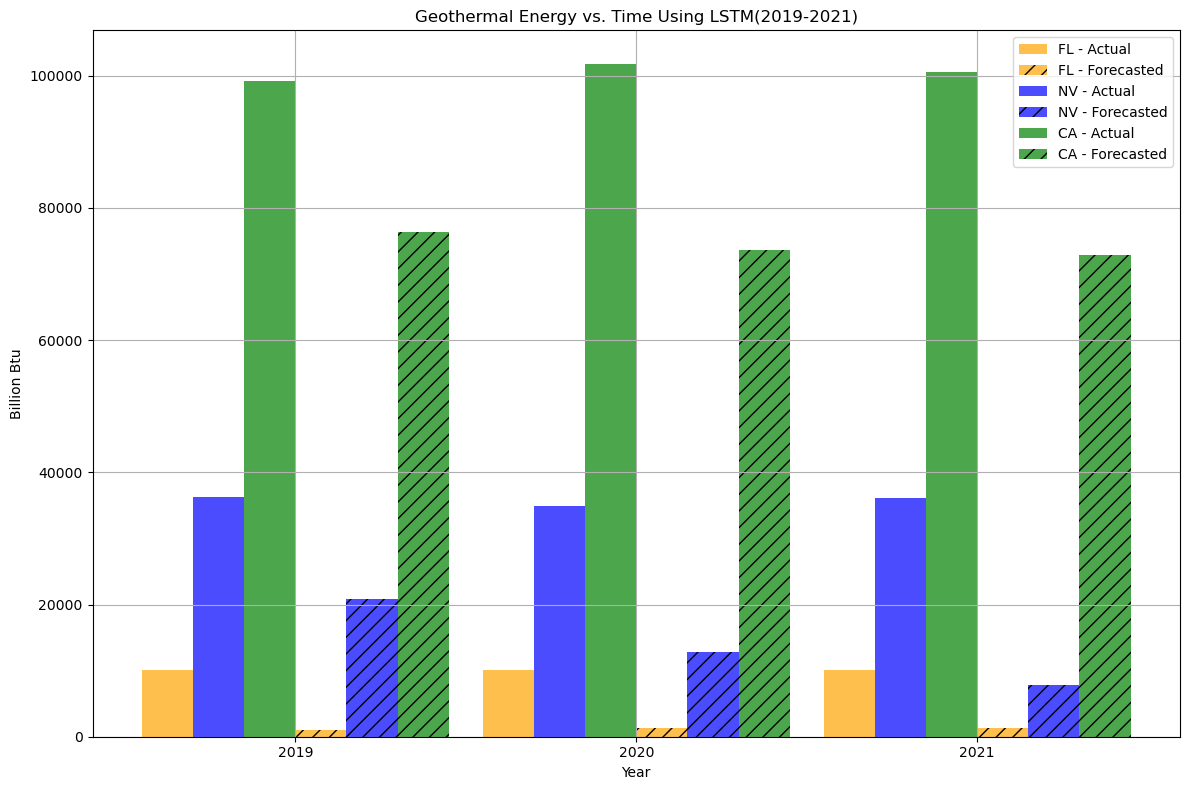

In [24]:
# list of state abbreviations to plot
state_abbreviations =  ['FL','NV','CA']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Geothermal_T.iloc[-3:]
years_forecast = selected_years

# Set the width of the bars
bar_width = 0.15  

# colors for each state
state_colors = {'NV': 'blue', 'CA': 'green', 'FL': 'orange'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_lstm[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Geothermal Energy vs. Time Using LSTM(2019-2021)')

# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()


### GRU

In [35]:
# sequence length and accuracy threshold
sequence_length_gru = 40
accuracy_threshold_gru = 0.01  

# Loop through each selected state
state_mse_gru = {}
state_rmse_gru = {}
state_forecasts_gru = {}
state_predictions_gru = {}  

for state in ['FL','NV','CA']:
    # Extract the data for the selected state
    data = Geothermal.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for GRU
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_gru):
        seq = scaled_data[i:i + sequence_length_gru]
        target = scaled_data[i + sequence_length_gru]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train a GRU model
    model_gru = Sequential()
    model_gru.add(GRU(units=50, activation='relu', input_shape=(sequence_length_gru, 1)))
    model_gru.add(Dense(units=1))
    model_gru.compile(optimizer='adam', loss='mean_squared_error')
    # Lists to store forecast
    forecasts_gru = []
    # Lists to store actual values
    actual_values_gru = []
    # Lists to store predictions
    predictions_gru = []
    # Iterate through the forecast years
    current_sequence_gru = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
        actual_value_gru = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_gru.reshape(1, sequence_length_gru, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_gru)
        mse_gru = mean_squared_error([actual_value_gru], [forecast_gru[0]])
        model_gru.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_gru = np.append(current_sequence_gru[1:], forecast_gru[0])
        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_gru > accuracy_threshold_gru:
            continue
        else:
            forecasts_gru.append(forecast_gru[0])
            actual_values_gru.append(actual_value_gru)
            # Store the prediction for the current year
            prediction_gru = scaler.inverse_transform(forecast_gru.reshape(-1, 1))[0][0]
            predictions_gru.append(prediction_gru)
    # Inverse transform the forecasts and actual values to the original scale
    forecasts_gru = scaler.inverse_transform(np.array(forecasts_gru).reshape(-1, 1))
    actual_values_gru = scaler.inverse_transform(np.array(actual_values_gru).reshape(-1, 1))
    # Calculate the MSE
    mse_gru = mean_squared_error(actual_values_gru, forecasts_gru)
    # Calculate the RMSE
    rmse_gru = np.sqrt(mse_gru)
    state_mse_gru[state] = mse_gru
    state_rmse_gru[state] = rmse_gru

    # Forecast for 2022 and 2023
    forecast_2022_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2022_gru[0])
    forecast_2023_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_gru = scaler.inverse_transform(forecast_2022_gru.reshape(-1, 1))[0][0]
    forecast_2023_gru = scaler.inverse_transform(forecast_2023_gru.reshape(-1, 1))[0][0]
    # Store predictions for 2022 and 2023
    state_forecasts_gru[state] = {'2022': forecast_2022_gru, '2023': forecast_2023_gru}

    # Forecast and Store predictions for 2019
    forecast_2019_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2019_gru[0])
    # Forecast and Store predictions for 2020
    forecast_2020_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2020_gru[0])
    # Forecast and Store predictions for 2021
    forecast_2021_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2021_gru[0])

    # Inverse transform the predictions for 2019
    prediction_2019_gru = scaler.inverse_transform(forecast_2019_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_gru = scaler.inverse_transform(forecast_2020_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_gru = scaler.inverse_transform(forecast_2021_gru.reshape(-1, 1))[0][0]
    state_predictions_gru[state] = {'2019': prediction_2019_gru, '2020': prediction_2020_gru, '2021': prediction_2021_gru}

# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_gru.items():
    print(f"MSE for {state} (GRU): {mse_value:.2f}")
    
# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_gru.items():
    print(f"RMSE for {state} (GRU): {rmse_value:.2f}")

# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_gru.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_gru.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for GRU
state_accuracies_gru = {}

for state in state_predictions_gru:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Geothermal.loc[state].loc[int(year)]
        predicted_value = state_predictions_gru[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_gru[state] = accuracies_state

# Print accuracies for each state and year for GRU
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (GRU):")
for state, accuracies_state in state_accuracies_gru.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 1s 715ms/step
Epoch 1/20
23/23 [==============================] - 5s 19ms/step - loss: 0.4770
Epoch 2/20
23/23 [==============================] - 0s 20ms/step - loss: 0.2415
Epoch 3/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0734
Epoch 4/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0626
Epoch 5/20
23/23 [==============================] - 0s 17ms/step - loss: 0.0619
Epoch 6/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0572
Epoch 7/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0583
Epoch 8/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0558
Epoch 9/20
23/23 [==============================] - 0s 17ms/step - loss: 0.0546
Epoch 10/20
23/23 [==============================] - 0s 21ms/step - loss: 0.0569
Epoch 11/20
23/23 [==============================] - 0s 20ms/step - loss: 0.0547
Epoch 12/20
23/23 [==============================] - 0s 18ms/step

32/32 [==============================] - 1s 19ms/step - loss: 0.0272
Epoch 18/20
32/32 [==============================] - 1s 19ms/step - loss: 0.0260
Epoch 19/20
32/32 [==============================] - 1s 20ms/step - loss: 0.0287
Epoch 20/20
1/1 [==============================] - 0s 67ms/step
Epoch 1/20
33/33 [==============================] - 1s 19ms/step - loss: 0.0260
Epoch 2/20
33/33 [==============================] - 1s 18ms/step - loss: 0.0256
Epoch 3/20
33/33 [==============================] - 1s 18ms/step - loss: 0.0242
Epoch 4/20
33/33 [==============================] - 1s 19ms/step - loss: 0.0252
Epoch 5/20
33/33 [==============================] - 1s 19ms/step - loss: 0.0265
Epoch 6/20
33/33 [==============================] - 1s 19ms/step - loss: 0.0250
Epoch 7/20
33/33 [==============================] - 1s 19ms/step - loss: 0.0250
Epoch 8/20
33/33 [==============================] - 1s 18ms/step - loss: 0.0267
Epoch 9/20
33/33 [==============================] - 1s 19ms/step 

42/42 [==============================] - 1s 19ms/step - loss: 0.0188
Epoch 14/20
42/42 [==============================] - 1s 19ms/step - loss: 0.0185
Epoch 15/20
42/42 [==============================] - 1s 18ms/step - loss: 0.0174
Epoch 16/20
42/42 [==============================] - 1s 18ms/step - loss: 0.0201
Epoch 17/20
42/42 [==============================] - 1s 19ms/step - loss: 0.0201
Epoch 18/20
42/42 [==============================] - 1s 19ms/step - loss: 0.0195
Epoch 19/20
42/42 [==============================] - 1s 18ms/step - loss: 0.0205
Epoch 20/20
1/1 [==============================] - 0s 65ms/step
Epoch 1/20
43/43 [==============================] - 1s 19ms/step - loss: 0.0190
Epoch 2/20
43/43 [==============================] - 1s 19ms/step - loss: 0.0184
Epoch 3/20
43/43 [==============================] - 1s 20ms/step - loss: 0.0183
Epoch 4/20
43/43 [==============================] - 1s 18ms/step - loss: 0.0192
Epoch 5/20
43/43 [==============================] - 1s 19ms/s

52/52 [==============================] - 1s 19ms/step - loss: 0.0142
Epoch 10/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0147
Epoch 11/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0155
Epoch 12/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0138
Epoch 13/20
52/52 [==============================] - 1s 18ms/step - loss: 0.0152
Epoch 14/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0123
Epoch 15/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0178
Epoch 16/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0204
Epoch 17/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0171
Epoch 18/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0148
Epoch 19/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0160
Epoch 20/20
1/1 [==============================] - 0s 90ms/step
Epoch 1/20
53/53 [==============================] - 1s 19

62/62 [==============================] - 1s 9ms/step - loss: 0.0153
Epoch 7/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0161
Epoch 8/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0149
Epoch 9/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0155
Epoch 10/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0151
Epoch 11/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0149
Epoch 12/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0159
Epoch 13/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0145
Epoch 14/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0155
Epoch 15/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0157
Epoch 16/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0150
Epoch 17/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0136
Epoch 18/20
62/62 [==============================] - 1s

32/32 [==============================] - 0s 9ms/step - loss: 0.0278
Epoch 2/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0269
Epoch 3/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0263
Epoch 4/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0261
Epoch 5/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0242
Epoch 6/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0264
Epoch 7/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0236
Epoch 8/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0264
Epoch 9/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 10/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0230
Epoch 11/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 12/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0247
Epoch 13/20
32/32 [==============================] - 0s 9ms/

1/1 [==============================] - 0s 31ms/step
Epoch 1/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 2/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 3/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 4/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 5/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 6/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0178
Epoch 7/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0151
Epoch 8/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0151
Epoch 9/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0175
Epoch 10/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 11/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0159
Epoch 12/20
42/42 [==============================] - 0s 9ms/step - loss: 0.01

51/51 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 19/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 20/20
1/1 [==============================] - 0s 26ms/step
Epoch 1/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 2/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 3/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0132
Epoch 4/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0131
Epoch 5/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0143
Epoch 6/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 7/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 8/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 9/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 10/20
52/52 [==============================] - 0s 9ms/step - loss: 0.01

61/61 [==============================] - 1s 9ms/step - loss: 0.0112
Epoch 17/20
61/61 [==============================] - 1s 8ms/step - loss: 0.0102
Epoch 18/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0102
Epoch 19/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0104
Epoch 20/20
1/1 [==============================] - 0s 54ms/step
Epoch 1/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0099
Epoch 2/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0106
Epoch 3/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0108
Epoch 4/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0104
Epoch 5/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0108
Epoch 6/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0105
Epoch 7/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0091
Epoch 8/20
62/62 [==============================] - 1s 9ms/step - loss: 0.

31/31 [==============================] - 0s 9ms/step - loss: 0.0044
Epoch 12/20
31/31 [==============================] - 0s 8ms/step - loss: 0.0050
Epoch 13/20
31/31 [==============================] - 0s 9ms/step - loss: 0.0056
Epoch 14/20
31/31 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 15/20
31/31 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 16/20
31/31 [==============================] - 0s 8ms/step - loss: 0.0044
Epoch 17/20
31/31 [==============================] - 0s 9ms/step - loss: 0.0043
Epoch 18/20
31/31 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 19/20
31/31 [==============================] - 0s 9ms/step - loss: 0.0046
Epoch 20/20
1/1 [==============================] - 0s 18ms/step
Epoch 1/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0042
Epoch 2/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0046
Epoch 3/20
32/32 [==============================] - 0s 10ms/step - los

41/41 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 10/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 11/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 12/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 13/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 14/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0031
Epoch 15/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 16/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 17/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 18/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0030
Epoch 19/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 20/20
1/1 [==============================] - 0s 24ms/step
Epoch 1/20
42/42 [==============================] - 0s 9ms/step - lo

51/51 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 8/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0021
Epoch 9/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 10/20
51/51 [==============================] - 0s 10ms/step - loss: 0.0018
Epoch 11/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 12/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0021
Epoch 13/20
51/51 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 14/20
51/51 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 15/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 16/20
51/51 [==============================] - 0s 10ms/step - loss: 0.0018
Epoch 17/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 18/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 19/20
51/51 [==============================

61/61 [==============================] - 1s 9ms/step - loss: 0.0014
Epoch 6/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0014
Epoch 7/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0014
Epoch 8/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 9/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 10/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 11/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0014
Epoch 12/20
61/61 [==============================] - 1s 10ms/step - loss: 0.0014
Epoch 13/20
61/61 [==============================] - 1s 10ms/step - loss: 0.0015
Epoch 14/20
61/61 [==============================] - 1s 10ms/step - loss: 0.0013
Epoch 15/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0014
Epoch 16/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 17/20
61/61 [==============================] - 

In [10]:
# sequence length and accuracy threshold
sequence_length_gru = 50
accuracy_threshold_gru = 0.01  

# Loop through each selected state
state_mse_gru = {}
state_rmse_gru = {}
state_forecasts_gru = {}
state_predictions_gru = {}  

for state in ['FL','NV','CA']:
    # Extract the data for the selected state
    data = Geothermal.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for GRU
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_gru):
        seq = scaled_data[i:i + sequence_length_gru]
        target = scaled_data[i + sequence_length_gru]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train a GRU model
    model_gru = Sequential()
    model_gru.add(GRU(units=50, activation='relu', input_shape=(sequence_length_gru, 1)))
    model_gru.add(Dense(units=1))
    model_gru.compile(optimizer='adam', loss='mean_squared_error')
    # Lists to store forecast
    forecasts_gru = []
    # Lists to store actual values
    actual_values_gru = []
    # Lists to store predictions
    predictions_gru = []
    # Iterate through the forecast years
    current_sequence_gru = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
        actual_value_gru = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_gru.reshape(1, sequence_length_gru, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_gru)
        mse_gru = mean_squared_error([actual_value_gru], [forecast_gru[0]])
        model_gru.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_gru = np.append(current_sequence_gru[1:], forecast_gru[0])
        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_gru > accuracy_threshold_gru:
            continue
        else:
            forecasts_gru.append(forecast_gru[0])
            actual_values_gru.append(actual_value_gru)
            # Store the prediction for the current year
            prediction_gru = scaler.inverse_transform(forecast_gru.reshape(-1, 1))[0][0]
            predictions_gru.append(prediction_gru)
    # Inverse transform the forecasts and actual values to the original scale
    forecasts_gru = scaler.inverse_transform(np.array(forecasts_gru).reshape(-1, 1))
    actual_values_gru = scaler.inverse_transform(np.array(actual_values_gru).reshape(-1, 1))
    # Calculate the MSE
    mse_gru = mean_squared_error(actual_values_gru, forecasts_gru)
    # Calculate the RMSE
    rmse_gru = np.sqrt(mse_gru)
    state_mse_gru[state] = mse_gru
    state_rmse_gru[state] = rmse_gru

    # Forecast for 2022 and 2023
    forecast_2022_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2022_gru[0])
    forecast_2023_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_gru = scaler.inverse_transform(forecast_2022_gru.reshape(-1, 1))[0][0]
    forecast_2023_gru = scaler.inverse_transform(forecast_2023_gru.reshape(-1, 1))[0][0]
    # Store predictions for 2022 and 2023
    state_forecasts_gru[state] = {'2022': forecast_2022_gru, '2023': forecast_2023_gru}

    # Forecast and Store predictions for 2019
    forecast_2019_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2019_gru[0])
    # Forecast and Store predictions for 2020
    forecast_2020_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2020_gru[0])
    # Forecast and Store predictions for 2021
    forecast_2021_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2021_gru[0])

    # Inverse transform the predictions for 2019
    prediction_2019_gru = scaler.inverse_transform(forecast_2019_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_gru = scaler.inverse_transform(forecast_2020_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_gru = scaler.inverse_transform(forecast_2021_gru.reshape(-1, 1))[0][0]
    state_predictions_gru[state] = {'2019': prediction_2019_gru, '2020': prediction_2020_gru, '2021': prediction_2021_gru}

# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_gru.items():
    print(f"MSE for {state} (GRU): {mse_value:.2f}")
    
# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_gru.items():
    print(f"RMSE for {state} (GRU): {rmse_value:.2f}")

# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_gru.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_gru.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for GRU
state_accuracies_gru = {}

for state in state_predictions_gru:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Geothermal.loc[state].loc[int(year)]
        predicted_value = state_predictions_gru[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_gru[state] = accuracies_state

# Print accuracies for each state and year for GRU
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (GRU):")
for state, accuracies_state in state_accuracies_gru.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 247ms/step
Epoch 1/20
13/13 [==============================] - 2s 10ms/step - loss: 0.8446
Epoch 2/20
13/13 [==============================] - 0s 12ms/step - loss: 0.5355
Epoch 3/20
13/13 [==============================] - 0s 12ms/step - loss: 0.2920
Epoch 4/20
13/13 [==============================] - 0s 12ms/step - loss: 0.1321
Epoch 5/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0961
Epoch 6/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0895
Epoch 7/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0866
Epoch 8/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0855
Epoch 9/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0849
Epoch 10/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0882
Epoch 11/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0792
Epoch 12/20
13/13 [==============================] - 0s 11ms/step

22/22 [==============================] - 0s 11ms/step - loss: 0.0405
Epoch 18/20
22/22 [==============================] - 0s 10ms/step - loss: 0.0416
Epoch 19/20
22/22 [==============================] - 0s 12ms/step - loss: 0.0357
Epoch 20/20
1/1 [==============================] - 0s 32ms/step
Epoch 1/20
23/23 [==============================] - 0s 11ms/step - loss: 0.0350
Epoch 2/20
23/23 [==============================] - 0s 11ms/step - loss: 0.0360
Epoch 3/20
23/23 [==============================] - 0s 12ms/step - loss: 0.0356
Epoch 4/20
23/23 [==============================] - 0s 11ms/step - loss: 0.0346
Epoch 5/20
23/23 [==============================] - 0s 12ms/step - loss: 0.0338
Epoch 6/20
23/23 [==============================] - 0s 14ms/step - loss: 0.0337
Epoch 7/20
23/23 [==============================] - 0s 15ms/step - loss: 0.0365
Epoch 8/20
23/23 [==============================] - 0s 16ms/step - loss: 0.0359
Epoch 9/20
23/23 [==============================] - 0s 15ms/step 

32/32 [==============================] - 0s 12ms/step - loss: 0.0260
Epoch 14/20
32/32 [==============================] - 0s 12ms/step - loss: 0.0256
Epoch 15/20
32/32 [==============================] - 0s 13ms/step - loss: 0.0255
Epoch 16/20
32/32 [==============================] - 0s 11ms/step - loss: 0.0245
Epoch 17/20
32/32 [==============================] - 0s 11ms/step - loss: 0.0254
Epoch 18/20
32/32 [==============================] - 0s 13ms/step - loss: 0.0288
Epoch 19/20
32/32 [==============================] - 0s 12ms/step - loss: 0.0254
Epoch 20/20
1/1 [==============================] - 0s 39ms/step
Epoch 1/20
33/33 [==============================] - 0s 12ms/step - loss: 0.0231
Epoch 2/20
33/33 [==============================] - 0s 11ms/step - loss: 0.0248
Epoch 3/20
33/33 [==============================] - 0s 12ms/step - loss: 0.0249
Epoch 4/20
33/33 [==============================] - 0s 11ms/step - loss: 0.0254
Epoch 5/20
33/33 [==============================] - 0s 11ms/s

42/42 [==============================] - 0s 11ms/step - loss: 0.0194
Epoch 10/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0196
Epoch 11/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0187
Epoch 12/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0181
Epoch 13/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0190
Epoch 14/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0176
Epoch 15/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0178
Epoch 16/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0207
Epoch 17/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0168
Epoch 18/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0190
Epoch 19/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0170
Epoch 20/20
1/1 [==============================] - 0s 40ms/step
Epoch 1/20
43/43 [==============================] - 1s 12

52/52 [==============================] - 1s 11ms/step - loss: 0.0153
Epoch 6/20
52/52 [==============================] - 1s 12ms/step - loss: 0.0134
Epoch 7/20
52/52 [==============================] - 1s 12ms/step - loss: 0.0147
Epoch 8/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0145
Epoch 9/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0165
Epoch 10/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0148
Epoch 11/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0145
Epoch 12/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0139
Epoch 13/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0125
Epoch 14/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0139
Epoch 15/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0139
Epoch 16/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0139
Epoch 17/20
52/52 [=========================

62/62 [==============================] - 1s 10ms/step - loss: 0.0132
Epoch 2/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0119
Epoch 3/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0150
Epoch 4/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0122
Epoch 5/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0116
Epoch 6/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0122
Epoch 7/20
62/62 [==============================] - 1s 12ms/step - loss: 0.0134
Epoch 8/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0124
Epoch 9/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0111
Epoch 10/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0131
Epoch 11/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0122
Epoch 12/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0122
Epoch 13/20
62/62 [=============================

16/16 [==============================] - 0s 11ms/step - loss: 0.0496
Epoch 18/20
16/16 [==============================] - 0s 11ms/step - loss: 0.0558
Epoch 19/20
16/16 [==============================] - 0s 11ms/step - loss: 0.0663
Epoch 20/20
1/1 [==============================] - 0s 22ms/step
Epoch 1/20
17/17 [==============================] - 0s 12ms/step - loss: 0.0517
Epoch 2/20
17/17 [==============================] - 0s 11ms/step - loss: 0.0532
Epoch 3/20
17/17 [==============================] - 0s 11ms/step - loss: 0.0449
Epoch 4/20
17/17 [==============================] - 0s 11ms/step - loss: 0.0482
Epoch 5/20
17/17 [==============================] - 0s 10ms/step - loss: 0.0495
Epoch 6/20
17/17 [==============================] - 0s 12ms/step - loss: 0.0483
Epoch 7/20
17/17 [==============================] - 0s 11ms/step - loss: 0.0466
Epoch 8/20
17/17 [==============================] - 0s 13ms/step - loss: 0.0451
Epoch 9/20
17/17 [==============================] - 0s 12ms/step 

26/26 [==============================] - 0s 11ms/step - loss: 0.0277
Epoch 14/20
26/26 [==============================] - 0s 11ms/step - loss: 0.0255
Epoch 15/20
26/26 [==============================] - 0s 11ms/step - loss: 0.0265
Epoch 16/20
26/26 [==============================] - 0s 12ms/step - loss: 0.0271
Epoch 17/20
26/26 [==============================] - 0s 11ms/step - loss: 0.0262
Epoch 18/20
26/26 [==============================] - 0s 11ms/step - loss: 0.0256
Epoch 19/20
26/26 [==============================] - 0s 12ms/step - loss: 0.0243
Epoch 20/20
1/1 [==============================] - 0s 24ms/step
Epoch 1/20
27/27 [==============================] - 0s 11ms/step - loss: 0.0288
Epoch 2/20
27/27 [==============================] - 0s 12ms/step - loss: 0.0297
Epoch 3/20
27/27 [==============================] - 0s 11ms/step - loss: 0.0297
Epoch 4/20
27/27 [==============================] - 0s 11ms/step - loss: 0.0283
Epoch 5/20
27/27 [==============================] - 0s 10ms/s

36/36 [==============================] - 0s 11ms/step - loss: 0.0223
Epoch 10/20
36/36 [==============================] - 0s 11ms/step - loss: 0.0187
Epoch 11/20
36/36 [==============================] - 0s 11ms/step - loss: 0.0209
Epoch 12/20
36/36 [==============================] - 0s 11ms/step - loss: 0.0218
Epoch 13/20
36/36 [==============================] - 0s 13ms/step - loss: 0.0203
Epoch 14/20
36/36 [==============================] - 0s 13ms/step - loss: 0.0186
Epoch 15/20
36/36 [==============================] - 0s 12ms/step - loss: 0.0197
Epoch 16/20
36/36 [==============================] - 0s 12ms/step - loss: 0.0200
Epoch 17/20
36/36 [==============================] - 0s 13ms/step - loss: 0.0210
Epoch 18/20
36/36 [==============================] - 0s 13ms/step - loss: 0.0225
Epoch 19/20
36/36 [==============================] - 0s 13ms/step - loss: 0.0225
Epoch 20/20
1/1 [==============================] - 0s 42ms/step
Epoch 1/20
37/37 [==============================] - 0s 13

46/46 [==============================] - 1s 12ms/step - loss: 0.0150
Epoch 6/20
46/46 [==============================] - 0s 11ms/step - loss: 0.0143
Epoch 7/20
46/46 [==============================] - 1s 11ms/step - loss: 0.0144
Epoch 8/20
46/46 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 9/20
46/46 [==============================] - 1s 12ms/step - loss: 0.0170
Epoch 10/20
46/46 [==============================] - 1s 11ms/step - loss: 0.0149
Epoch 11/20
46/46 [==============================] - 1s 11ms/step - loss: 0.0159
Epoch 12/20
46/46 [==============================] - 0s 11ms/step - loss: 0.0153
Epoch 13/20
46/46 [==============================] - 1s 11ms/step - loss: 0.0161
Epoch 14/20
46/46 [==============================] - 0s 11ms/step - loss: 0.0155
Epoch 15/20
46/46 [==============================] - 1s 12ms/step - loss: 0.0146
Epoch 16/20
46/46 [==============================] - 1s 11ms/step - loss: 0.0153
Epoch 17/20
46/46 [=========================

56/56 [==============================] - 1s 11ms/step - loss: 0.0117
Epoch 2/20
56/56 [==============================] - 1s 11ms/step - loss: 0.0134
Epoch 3/20
56/56 [==============================] - 1s 11ms/step - loss: 0.0124
Epoch 4/20
56/56 [==============================] - 1s 11ms/step - loss: 0.0111
Epoch 5/20
56/56 [==============================] - 1s 11ms/step - loss: 0.0125
Epoch 6/20
56/56 [==============================] - 1s 11ms/step - loss: 0.0131
Epoch 7/20
56/56 [==============================] - 1s 11ms/step - loss: 0.0119
Epoch 8/20
56/56 [==============================] - 1s 11ms/step - loss: 0.0116
Epoch 9/20
56/56 [==============================] - 1s 11ms/step - loss: 0.0131
Epoch 10/20
56/56 [==============================] - 1s 11ms/step - loss: 0.0109
Epoch 11/20
56/56 [==============================] - 1s 10ms/step - loss: 0.0113
Epoch 12/20
56/56 [==============================] - 1s 11ms/step - loss: 0.0127
Epoch 13/20
56/56 [=============================

15/15 [==============================] - 0s 11ms/step - loss: 0.0198
Epoch 16/20
15/15 [==============================] - 0s 12ms/step - loss: 0.0204
Epoch 17/20
15/15 [==============================] - 0s 13ms/step - loss: 0.0193
Epoch 18/20
15/15 [==============================] - 0s 11ms/step - loss: 0.0179
Epoch 19/20
15/15 [==============================] - 0s 11ms/step - loss: 0.0190
Epoch 20/20
1/1 [==============================] - 0s 29ms/step
Epoch 1/20
16/16 [==============================] - 0s 12ms/step - loss: 0.0164
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 0.0186
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 0.0193
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.0167
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.0172
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.0175
Epoch 7/20
16/16 [==============================] - 0s 10ms/ste

25/25 [==============================] - 0s 13ms/step - loss: 0.0105
Epoch 12/20
25/25 [==============================] - 0s 13ms/step - loss: 0.0118
Epoch 13/20
25/25 [==============================] - 0s 14ms/step - loss: 0.0109
Epoch 14/20
25/25 [==============================] - 0s 13ms/step - loss: 0.0119
Epoch 15/20
25/25 [==============================] - 0s 11ms/step - loss: 0.0116
Epoch 16/20
25/25 [==============================] - 0s 12ms/step - loss: 0.0104
Epoch 17/20
25/25 [==============================] - 0s 15ms/step - loss: 0.0101
Epoch 18/20
25/25 [==============================] - 0s 12ms/step - loss: 0.0120
Epoch 19/20
25/25 [==============================] - 0s 13ms/step - loss: 0.0111
Epoch 20/20
1/1 [==============================] - 0s 34ms/step
Epoch 1/20
26/26 [==============================] - 0s 14ms/step - loss: 0.0133
Epoch 2/20
26/26 [==============================] - 0s 14ms/step - loss: 0.0112
Epoch 3/20
26/26 [==============================] - 0s 14ms

35/35 [==============================] - 0s 11ms/step - loss: 0.0094
Epoch 8/20
35/35 [==============================] - 0s 11ms/step - loss: 0.0087
Epoch 9/20
35/35 [==============================] - 0s 11ms/step - loss: 0.0086
Epoch 10/20
35/35 [==============================] - 0s 10ms/step - loss: 0.0102
Epoch 11/20
35/35 [==============================] - 0s 11ms/step - loss: 0.0090
Epoch 12/20
35/35 [==============================] - 0s 11ms/step - loss: 0.0094
Epoch 13/20
35/35 [==============================] - 0s 11ms/step - loss: 0.0095
Epoch 14/20
35/35 [==============================] - 0s 12ms/step - loss: 0.0088
Epoch 15/20
35/35 [==============================] - 0s 12ms/step - loss: 0.0085
Epoch 16/20
35/35 [==============================] - 0s 10ms/step - loss: 0.0079
Epoch 17/20
35/35 [==============================] - 0s 11ms/step - loss: 0.0088
Epoch 18/20
35/35 [==============================] - 0s 12ms/step - loss: 0.0088
Epoch 19/20
35/35 [=======================

45/45 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 4/20
45/45 [==============================] - 0s 11ms/step - loss: 0.0063
Epoch 5/20
45/45 [==============================] - 1s 11ms/step - loss: 0.0059
Epoch 6/20
45/45 [==============================] - 1s 12ms/step - loss: 0.0054
Epoch 7/20
45/45 [==============================] - 1s 12ms/step - loss: 0.0054
Epoch 8/20
45/45 [==============================] - 1s 13ms/step - loss: 0.0058
Epoch 9/20
45/45 [==============================] - 1s 14ms/step - loss: 0.0053
Epoch 10/20
45/45 [==============================] - 1s 13ms/step - loss: 0.0062
Epoch 11/20
45/45 [==============================] - 1s 14ms/step - loss: 0.0081
Epoch 12/20
45/45 [==============================] - 1s 15ms/step - loss: 0.0089
Epoch 13/20
45/45 [==============================] - 1s 12ms/step - loss: 0.0060
Epoch 14/20
45/45 [==============================] - 0s 11ms/step - loss: 0.0060
Epoch 15/20
45/45 [===========================

1/1 [==============================] - 0s 25ms/step
Epoch 1/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0048
Epoch 2/20
55/55 [==============================] - 1s 12ms/step - loss: 0.0039
Epoch 3/20
55/55 [==============================] - 1s 12ms/step - loss: 0.0040
Epoch 4/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0047
Epoch 5/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0041
Epoch 6/20
55/55 [==============================] - 1s 12ms/step - loss: 0.0042
Epoch 7/20
55/55 [==============================] - 1s 12ms/step - loss: 0.0045
Epoch 8/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0041
Epoch 9/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0043
Epoch 10/20
55/55 [==============================] - 1s 12ms/step - loss: 0.0043
Epoch 11/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0044
Epoch 12/20
55/55 [==============================] - 1s 12ms/step 

In [ ]:
# sequence length and accuracy threshold
sequence_length_gru = 50
accuracy_threshold_gru = 0.01  

# Loop through each selected state
state_mse_gru = {}
state_rmse_gru = {}
state_forecasts_gru = {}
state_predictions_gru = {}  

for state in ['FL','NV','CA']:
    # Extract the data for the selected state
    data = Geothermal.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for GRU
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_gru):
        seq = scaled_data[i:i + sequence_length_gru]
        target = scaled_data[i + sequence_length_gru]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train a GRU model
    model_gru = Sequential()
    model_gru.add(GRU(units=50, activation='relu', input_shape=(sequence_length_gru, 1)))
    model_gru.add(Dense(units=1))
    model_gru.compile(optimizer='adam', loss='mean_squared_error')
    # Lists to store forecast
    forecasts_gru = []
    # Lists to store actual values
    actual_values_gru = []
    # Lists to store predictions
    predictions_gru = []
    # Iterate through the forecast years
    current_sequence_gru = x_train_full[-1]
    for i in range(len(targets) - sequence_length_gru):
        forecast_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))

        # Use the 'i' variable as an index for the 'targets' array
        actual_value_gru = targets[i]

        x_train_full = np.append(x_train_full, current_sequence_gru.reshape(1, sequence_length_gru, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_gru)
        mse_gru = mean_squared_error([actual_value_gru], [forecast_gru[0]])
        model_gru.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_gru = np.append(current_sequence_gru[1:], forecast_gru[0])
        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_gru > accuracy_threshold_gru:
            continue
        else:
            forecasts_gru.append(forecast_gru[0])
            actual_values_gru.append(actual_value_gru)
            # Store the prediction for the current year
            prediction_gru = scaler.inverse_transform(forecast_gru.reshape(-1, 1))[0][0]
            predictions_gru.append(prediction_gru)
            # Store predictions for the current year in the state_predictions_gru dictionary
            state_predictions_gru[state][str(year)] = prediction_gru

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_gru = scaler.inverse_transform(np.array(forecasts_gru).reshape(-1, 1))
    actual_values_gru = scaler.inverse_transform(np.array(actual_values_gru).reshape(-1, 1))
    # Calculate the MSE
    mse_gru = mean_squared_error(actual_values_gru, forecasts_gru)
    # Calculate the RMSE
    rmse_gru = np.sqrt(mse_gru)
    state_mse_gru[state] = mse_gru
    state_rmse_gru[state] = rmse_gru

    # Forecast for 2022 and 2023 using the same method
    forecast_2022_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2022_gru[0])
    forecast_2023_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_gru = scaler.inverse_transform(forecast_2022_gru.reshape(-1, 1))[0][0]
    forecast_2023_gru = scaler.inverse_transform(forecast_2023_gru.reshape(-1, 1))[0][0]
    # Store predictions for 2022 and 2023
    state_forecasts_gru[state] = {'2022': forecast_2022_gru, '2023': forecast_2023_gru}

# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_gru.items():
    print(f"MSE for {state} (GRU): {mse_value:.2f}")
    
# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_gru.items():
    print(f"RMSE for {state} (GRU): {rmse_value:.2f}")

# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_gru.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_gru.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for GRU
state_accuracies_gru = {}

for state in state_predictions_gru:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Geothermal.loc[state].loc[int(year)]
        predicted_value = state_predictions_gru[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_gru[state] = accuracies_state

# Print accuracies for each state and year for GRU
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (GRU):")
for state, accuracies_state in state_accuracies_gru.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

### BAR GRAPH FOR GRU

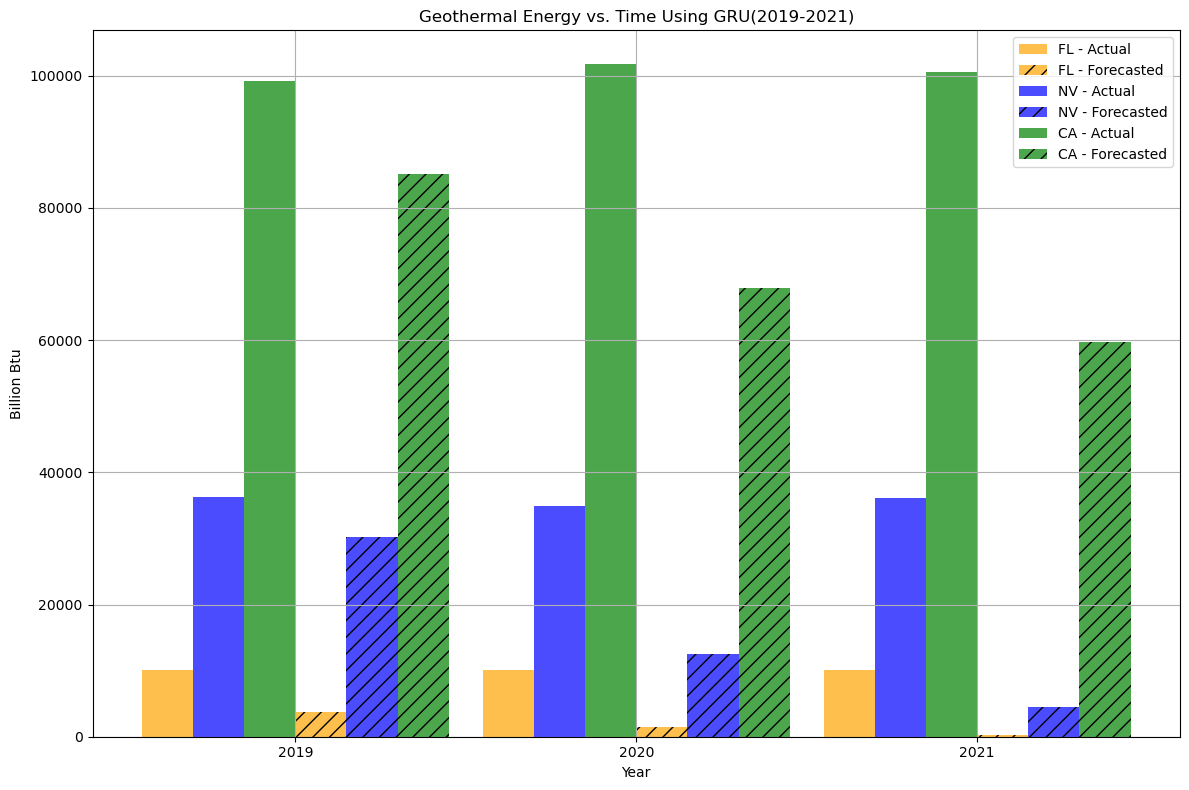

In [25]:
# list of state abbreviations to plot
state_abbreviations =  ['FL','NV','CA']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Geothermal_T.iloc[-3:]
years_forecast = selected_years

# Set the width of the bars
bar_width = 0.15  

# Define colors for each state
state_colors = {'NV': 'blue', 'CA': 'green', 'FL': 'orange'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_gru[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Geothermal Energy vs. Time Using GRU(2019-2021)')

# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()


## CNN

In [15]:
# sequence length and accuracy threshold
sequence_length_cnn = 50
accuracy_threshold_cnn = 0.01  

# Loop through each selected state
state_mse_cnn = {}
state_rmse_cnn = {}
state_forecasts_cnn = {}
state_predictions_cnn = {} 

for state in ['FL','NV','CA']:
    # Extract the data for the selected state
    data = Geothermal.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for CNN
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_cnn):
        seq = scaled_data[i:i + sequence_length_cnn]
        target = scaled_data[i + sequence_length_cnn]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train a more complex CNN model with different learning rate
    custom_optimizer = Adam(learning_rate=0.001)
    model_cnn = Sequential()
    model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length_cnn, 1)))
    model_cnn.add(MaxPooling1D(pool_size=2))
    model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model_cnn.add(MaxPooling1D(pool_size=2))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(units=100, activation='relu'))
    model_cnn.add(Dropout(0.2))
    model_cnn.add(Dense(units=50, activation='relu'))
    model_cnn.add(Dense(units=1))
    model_cnn.compile(optimizer=custom_optimizer, loss='mean_squared_error')
    # Lists to store forecasts, actual values, and predictions
    forecasts_cnn = []
    actual_values_cnn = []
    predictions_cnn = []
    # Iterate through the forecast years
    current_sequence_cnn = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
        actual_value_cnn = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_cnn.reshape(1, sequence_length_cnn, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_cnn)
        mse_cnn = mean_squared_error([actual_value_cnn], [forecast_cnn[0]])
        model_cnn.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_cnn[0])
        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_cnn > accuracy_threshold_cnn:
            continue
        else:
            forecasts_cnn.append(forecast_cnn[0])
            actual_values_cnn.append(actual_value_cnn)
            # Store the prediction for the current year
            prediction_cnn = scaler.inverse_transform(forecast_cnn.reshape(-1, 1))[0][0]
            predictions_cnn.append(prediction_cnn)
    # Inverse transform the forecasts and actual values to the original scale
    forecasts_cnn = scaler.inverse_transform(np.array(forecasts_cnn).reshape(-1, 1))
    actual_values_cnn = scaler.inverse_transform(np.array(actual_values_cnn).reshape(-1, 1))
    # Calculate the MSE
    mse_cnn = mean_squared_error(actual_values_cnn, forecasts_cnn)
    # Calculate the RMSE
    rmse_cnn = np.sqrt(mse_cnn)
    state_mse_cnn[state] = mse_cnn
    state_rmse_cnn[state] = rmse_cnn
    # Forecast for 2022
    forecast_2022_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2022_cnn[0])
    # Forecast for 2023
    forecast_2023_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    # Inverse transform the forecasts to the original scale for 2022
    forecast_2022_cnn = scaler.inverse_transform(forecast_2022_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the forecasts to the original scale for 2023
    forecast_2023_cnn = scaler.inverse_transform(forecast_2023_cnn.reshape(-1, 1))[0][0]
    state_forecasts_cnn[state] = {'2022': forecast_2022_cnn, '2023': forecast_2023_cnn}
    # Store predictions for 2019
    forecast_2019_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2019_cnn[0])
    # Store predictions for 2020
    forecast_2020_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2020_cnn[0])
    # Store predictions for 2021
    forecast_2021_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2021_cnn[0])
    # Inverse transform the predictions to the original scale for 2019
    prediction_2019_cnn = scaler.inverse_transform(forecast_2019_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the predictions to the original scale for 2020
    prediction_2020_cnn = scaler.inverse_transform(forecast_2020_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the predictions to the original scale for 2021
    prediction_2021_cnn = scaler.inverse_transform(forecast_2021_cnn.reshape(-1, 1))[0][0]
    # store the values for 2019,2020 and 2021
    state_predictions_cnn[state] = {'2019': prediction_2019_cnn, '2020': prediction_2020_cnn, '2021': prediction_2021_cnn}
# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_cnn.items():
    print(f"MSE for {state} (CNN): {mse_value:.2f}") 
# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_cnn.items():
    print(f"RMSE for {state} (CNN): {rmse_value:.2f}")
# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_cnn.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")
# Print predictions for 2019, 2020, and 2021 for selected states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_cnn.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")
# Calculate and store accuracy for each state and year for CNN
state_accuracies_cnn = {}
for state in state_predictions_cnn:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Geothermal.loc[state].loc[int(year)]
        predicted_value = state_predictions_cnn[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_cnn[state] = accuracies_state
# Print accuracies for each state and year for CNN
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (CNN):")
for state, accuracies_state in state_accuracies_cnn.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 240ms/step
Epoch 1/20
13/13 [==============================] - 2s 4ms/step - loss: 0.4896
Epoch 2/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0789
Epoch 3/20
13/13 [==============================] - 0s 5ms/step - loss: 0.1327
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 0.1460
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 0.1221
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 0.1568
Epoch 7/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0969
Epoch 8/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0826
Epoch 9/20
13/13 [==============================] - 0s 4ms/step - loss: 0.1198
Epoch 10/20
13/13 [==============================] - 0s 4ms/step - loss: 0.1367
Epoch 11/20
13/13 [==============================] - 0s 4ms/step - loss: 0.1368
Epoch 12/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0

22/22 [==============================] - 0s 3ms/step - loss: 0.0301
Epoch 20/20
1/1 [==============================] - 0s 41ms/step
Epoch 1/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0258
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 3/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0223
Epoch 4/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0272
Epoch 5/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0313
Epoch 6/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0300
Epoch 7/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0240
Epoch 8/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0322
Epoch 9/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0249
Epoch 10/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0216
Epoch 11/20
23/23 [==============================] - 0s 3ms/step - loss: 0.03

32/32 [==============================] - 0s 3ms/step - loss: 0.0186
Epoch 18/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 19/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 20/20
1/1 [==============================] - 0s 25ms/step
Epoch 1/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 2/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0178
Epoch 3/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0203
Epoch 4/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0207
Epoch 5/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 6/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0198
Epoch 7/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 8/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 9/20
33/33 [==============================] - 0s 3ms/step - loss: 0.01

42/42 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 16/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0214
Epoch 17/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 18/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 19/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0190
Epoch 20/20
1/1 [==============================] - 0s 27ms/step
Epoch 1/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 2/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 3/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 4/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0140
Epoch 5/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 6/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0145
Epoch 7/20
43/43 [==============================] - 0s 3ms/step - loss: 0.

52/52 [==============================] - 0s 4ms/step - loss: 0.0102
Epoch 14/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 15/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 16/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 17/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 18/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 19/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 20/20
1/1 [==============================] - 0s 27ms/step
Epoch 1/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 2/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 3/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0136
Epoch 4/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 5/20
53/53 [==============================] - 0s 3ms/step - loss: 

62/62 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 12/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 13/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 14/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 15/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 16/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 17/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 18/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 19/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 20/20
1/1 [==============================] - 0s 128ms/step
Epoch 1/20
13/13 [==============================] - 1s 4ms/step - loss: 0.3837
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1627
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - los

22/22 [==============================] - 0s 3ms/step - loss: 0.0281
Epoch 7/20
22/22 [==============================] - 0s 4ms/step - loss: 0.0294
Epoch 8/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0299
Epoch 9/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0245
Epoch 10/20
22/22 [==============================] - 0s 4ms/step - loss: 0.0261
Epoch 11/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0265
Epoch 12/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 13/20
22/22 [==============================] - 0s 5ms/step - loss: 0.0285
Epoch 14/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0258
Epoch 15/20
22/22 [==============================] - 0s 4ms/step - loss: 0.0252
Epoch 16/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0341
Epoch 17/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0258
Epoch 18/20
22/22 [==============================] - 0s

32/32 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0196
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0189
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 11/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0161
Epoch 12/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 13/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 14/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 15/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 16/20
32/32 [==============================] - 0s 3

42/42 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 3/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 4/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 5/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 6/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 7/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0185
Epoch 8/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 9/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 10/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0136
Epoch 11/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 12/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 13/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 14/20
42/42 [==============================] - 0s 4ms

1/1 [==============================] - 0s 30ms/step
Epoch 1/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 2/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 3/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 4/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 5/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 6/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 7/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 8/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 9/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 10/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 11/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 12/20
52/52 [==============================] - 0s 3ms/step - loss: 0.00

61/61 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 20/20
1/1 [==============================] - 0s 29ms/step
Epoch 1/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 2/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 3/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 4/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 5/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 6/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 7/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 8/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 9/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 10/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 11/20
62/62 [==============================] - 0s 3ms/step - loss: 0.00

21/21 [==============================] - 0s 4ms/step - loss: 0.0096
Epoch 15/20
21/21 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 16/20
21/21 [==============================] - 0s 4ms/step - loss: 0.0113
Epoch 17/20
21/21 [==============================] - 0s 4ms/step - loss: 0.0115
Epoch 18/20
21/21 [==============================] - 0s 4ms/step - loss: 0.0117
Epoch 19/20
21/21 [==============================] - 0s 4ms/step - loss: 0.0094
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
22/22 [==============================] - 0s 4ms/step - loss: 0.0099
Epoch 2/20
22/22 [==============================] - 0s 4ms/step - loss: 0.0106
Epoch 3/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 4/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 5/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 6/20
22/22 [==============================] - 0s 4ms/step - loss: 0

31/31 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 13/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 14/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 15/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 16/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 17/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 18/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 19/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 20/20
1/1 [==============================] - 0s 28ms/step
Epoch 1/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss:

41/41 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 11/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 12/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 13/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 14/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 15/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 16/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 17/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 18/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 19/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 20/20
1/1 [==============================] - 0s 28ms/step
Epoch 1/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 2/20
42/42 [==============================] - 0s 3ms/step - los

51/51 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 9/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 10/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 11/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 12/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 13/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 14/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 15/20
51/51 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 16/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 17/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 18/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 19/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 20/20
1/1 [==============================] - 0s

61/61 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 7/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 8/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 9/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 10/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 11/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 12/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 13/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 14/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 15/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 16/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 17/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 18/20
61/61 [==============================] - 0s

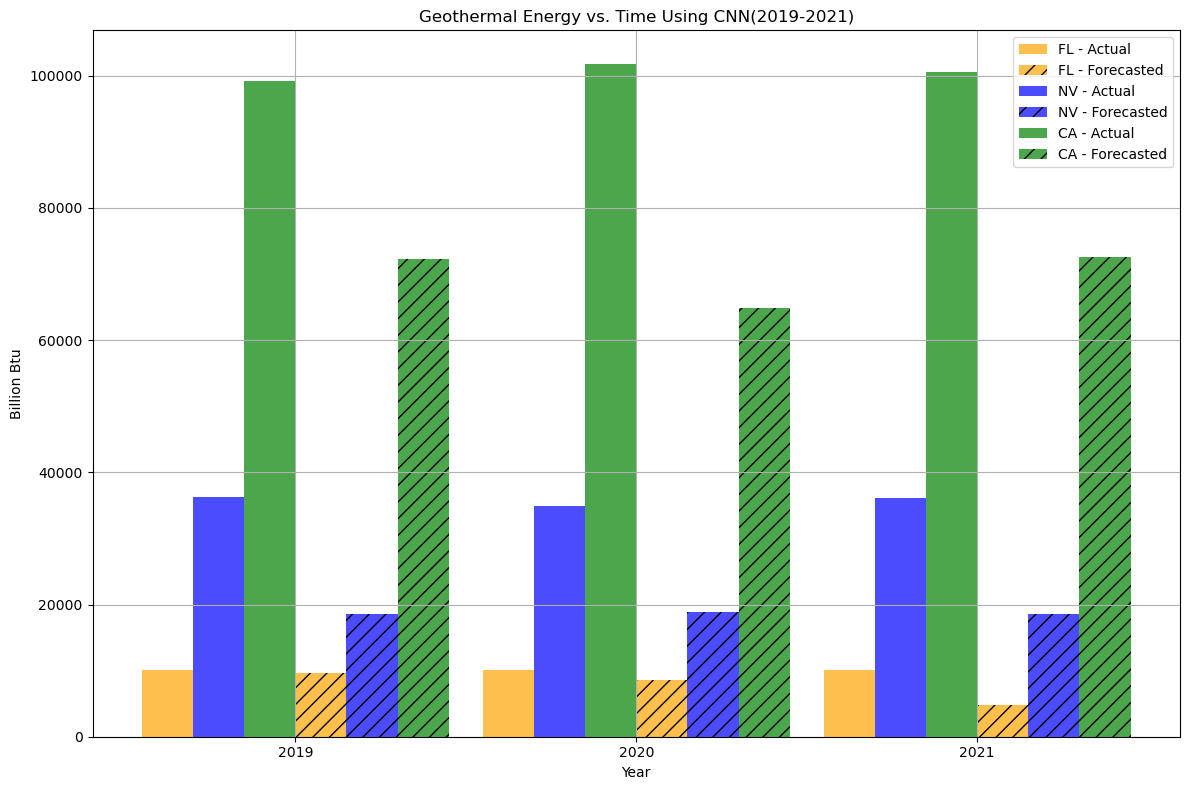

In [26]:
# list of state abbreviations to plot
state_abbreviations =  ['FL','NV','CA']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Geothermal_T.iloc[-3:]
years_forecast = selected_years

# Set the width of the bars
bar_width = 0.15  

# colors for each state
state_colors = {'NV': 'blue', 'CA': 'green', 'FL': 'orange'}

# bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_cnn[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Geothermal Energy vs. Time Using CNN(2019-2021)')

# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()


## ARIMA

In [36]:
# Function to perform ARIMA forecast
def arima_forecast(state_data, state_name, order=(5, 1, 0), forecast_steps=2):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(state_data.reshape(-1, 1))
    # split the training data
    train_size = int(len(scaled_data) * 0.8)
    train, test = scaled_data[:train_size], scaled_data[train_size:]
    # model 
    model = ARIMA(train, order=order)
    fit_model = model.fit()
    # forecast value
    forecast_values_arima = fit_model.forecast(steps=len(scaled_data) - train_size + forecast_steps)
    forecast_values_arima = scaler.inverse_transform(forecast_values_arima.reshape(-1, 1))
    # mse and rmse 
    mse_arima = mean_squared_error(state_data[train_size:], forecast_values_arima[:len(state_data) - train_size])
    rmse_arima = np.sqrt(mse_arima)
    # Forecasting 
    forecast_years_arima = forecast_values_arima[:len(state_data)]
    return mse_arima, rmse_arima, forecast_years_arima

# Selected states
selected_states = ['FL','NV','CA']

# Dictionaries to store results
mse_arima_dict = {}
rmse_arima_dict = {}
forecast_years_arima_dict = {}
accuracy_arima_dict = {}

# Loop through each selected state for ARIMA
for state in selected_states:
    state_data = Geothermal.loc[state].values
    mse_arima, rmse_arima, forecast_years_arima = arima_forecast(state_data, state, order=(5, 1, 0), forecast_steps=2)
    mse_arima_dict[state] = mse_arima
    rmse_arima_dict[state] = rmse_arima
    forecast_years_arima_dict[state] = forecast_years_arima
    
    # Calculate accuracy for each year
    actual_data = state_data[-3:]
    forecasted_data = forecast_years_arima[:3]
    accuracies = 100 - abs((forecasted_data - actual_data) / actual_data) * 100

    # arima accuracy dictanary 
    accuracy_arima_dict[state] = {
        '2019': accuracies[0][0],
        '2020': accuracies[1][0],
        '2021': accuracies[2][0]
    }

# Print the actual and forecasted values for each year and accuracy for each state
for state in selected_states:
    print(f"\n{state} - Forecasted Values for 2022 and 2023:")
    for year, forecast_value in zip(range(2022, 2024), forecast_years_arima[3:]):
        print(f"{year}: {forecast_value[0]:.2f}")
    print(f"Accuracy for {state} (ARIMA) - 2019: {accuracy_arima_dict[state]['2019']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2020: {accuracy_arima_dict[state]['2020']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2021: {accuracy_arima_dict[state]['2021']:.2f}%")



# Print the forecasted values for 2022 and 2023 for all states
print("\nForecasted Values for 2022 and 2023 (ARIMA):")
for year in range(2022, 2024):
    print(f"Forecasts for {year}:")
    for state in selected_states:
        forecast_value = forecast_years_arima_dict[state][year - 2019][0]
        print(f"{state}: {forecast_value:.2f}")

# Print MSE for all states
print("\nMean Squared Error (MSE) for All states:")
for state, mse_value in mse_arima_dict.items():
    print(f"MSE for {state} (ARIMA): {mse_value:.2f}")

# Print RMSE for all states
print("\nRoot Mean Squared Error (RMSE) for All states:")
for state, rmse_value in rmse_arima_dict.items():
    print(f"RMSE for {state} (ARIMA): {rmse_value:.2f}")


FL - Forecasted Values for 2022 and 2023:
2022: 127488.73
2023: 127200.14
Accuracy for FL (ARIMA) - 2019: 76.14%
Accuracy for FL (ARIMA) - 2020: 83.75%
Accuracy for FL (ARIMA) - 2021: 91.16%

NV - Forecasted Values for 2022 and 2023:
2022: 127488.73
2023: 127200.14
Accuracy for NV (ARIMA) - 2019: 39.73%
Accuracy for NV (ARIMA) - 2020: 40.91%
Accuracy for NV (ARIMA) - 2021: 39.90%

CA - Forecasted Values for 2022 and 2023:
2022: 127488.73
2023: 127200.14
Accuracy for CA (ARIMA) - 2019: 70.54%
Accuracy for CA (ARIMA) - 2020: 71.12%
Accuracy for CA (ARIMA) - 2021: 71.34%

Forecasted Values for 2022 and 2023 (ARIMA):
Forecasts for 2022:
FL: 9904.32
NV: 15036.13
CA: 127488.73
Forecasts for 2023:
FL: 10611.72
NV: 14630.80
CA: 127200.14

Mean Squared Error (MSE) for All states:
MSE for FL (ARIMA): 8550528.29
MSE for NV (ARIMA): 231832049.69
MSE for CA (ARIMA): 265826312.38

Root Mean Squared Error (RMSE) for All states:
RMSE for FL (ARIMA): 2924.13
RMSE for NV (ARIMA): 15226.03
RMSE for CA (

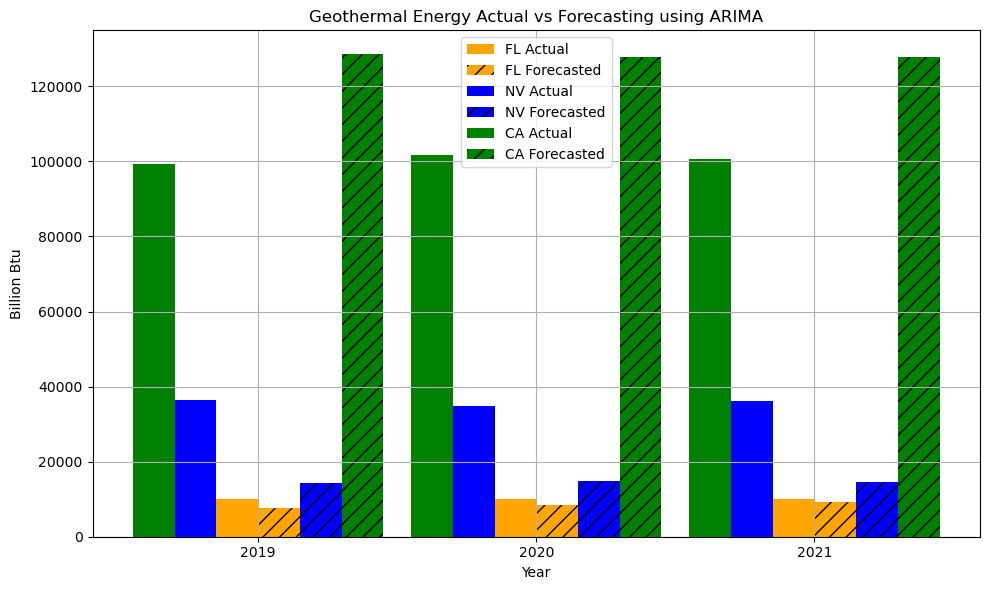

In [34]:
# colors for each state
state_colors = {'NV': 'blue', 'CA': 'green', 'FL': 'orange'}

# Create a figure
plt.figure(figsize=(10, 6))

# width of the bars and the space between bar groups
bar_width = 0.15  
space = np.arange(len(range(2019, 2022)))

# Loop through each selected state
for i, state in enumerate(selected_states):
    # Extract actual and forecasted data
    actual_data = Geothermal.loc[state].values[-3:]
    forecasted_data = np.array(forecast_years_arima_dict[state][:3]).flatten() 

    # Generate x values (years)
    years = range(2019, 2022)

    # Plot actual data with custom color on the left side
    plt.bar(space - bar_width/2 - i*bar_width, actual_data, bar_width, label=f'{state} Actual', color=state_colors[state])

    # Plot forecasted data with hatch pattern and custom color on the right side
    plt.bar(space + bar_width/2 + i*bar_width, forecasted_data, bar_width, label=f'{state} Forecasted', color=state_colors[state], hatch='//')

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Geothermal Energy Actual vs Forecasting using ARIMA')

# Add xticks
plt.xticks(space, years)

# Add a legend
plt.legend()

# Add grid
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


### Saving as one csv file.

In [ ]:
# Create the initial DataFrame
df_combined_results = pd.DataFrame({
    'State': list(mse_arima_dict.keys()),
    'MSE_lstm': list(state_mse_lstm.values()),
    'RMSE_lstm': list(state_rmse_lstm.values()),
    'Forecast_2022_lstm': [state_forecasts_lstm[state]['2022'] for state in state_forecasts_lstm],
    'Forecast_2023_lstm': [state_forecasts_lstm[state]['2023'] for state in state_forecasts_lstm],
    'MSE_cnn': list(state_mse_cnn.values()),
    'RMSE_cnn': list(state_rmse_cnn.values()),
    'Forecast_2022_cnn': [state_forecasts_cnn[state]['2022'] for state in state_forecasts_cnn],
    'Forecast_2023_cnn': [state_forecasts_cnn[state]['2023'] for state in state_forecasts_cnn],
    'MSE_gru': list(state_mse_gru.values()),
    'RMSE_gru': list(state_rmse_gru.values()),
    'Forecast_2022_gru': [state_forecasts_gru[state]['2022'] for state in state_forecasts_gru],
    'Forecast_2023_gru': [state_forecasts_gru[state]['2023'] for state in state_forecasts_gru],
    'MSE_arima': [mse_arima_dict[state] for state in selected_states],
    'RMSE_arima': [rmse_arima_dict[state] for state in selected_states],
    'Forecast_2022_arima': [forecast_years_arima_dict[state][2][0] for state in selected_states],
    'Forecast_2023_arima': [forecast_years_arima_dict[state][3][0] for state in selected_states],
})
# Save the combined DataFrame to a CSV file
df_combined_results.to_csv('combined_results_geothermal.csv', index=False)